# Soils4Africa: Building ML models from MIR data to predict soil properties

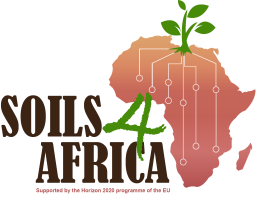

# Introduction

This script is dedicated in explaining the Machine Learning pipeline commonly employed in soil spectroscopy, where the goal is to predict the soil properties from the spectral data.

To this end, we employ the spectraxai library, a recently developed spectra processing package that will be open-sourced. 

Spectraxai is a package that aims to process input spectra with user-based choices and export useful information of various aspects:
* Visualize the spectra.
* Transform spectra with various preprocessings.
* Train Machine Learning models to predict several soil properties.
* Explainability of the methods used.

In this script, we aim to introduce the spectraxai's main components and utilizations in three distinct levels of familiarization:

* Begginer Level
* Intermediate Level
* Expert Level

## Dataset

Let's load the appropriate dataset using the pandas library and the appropriate path and visualize the imported spectra.

In [1]:
import pandas as pd
import os

data =  pd.read_csv("initial.data.S.Africa.csv")
data

,3996.7,3994.7,3992.6,3990.6,3988.5,3986.5,3984.4,3982.4,3980.3,3978.3,...,PH_CaCl2,AWR (ratio),Cat_Na (Cmolc/kg),Cat_K (Cmolc/kg),Cat_Ca (Cmolc/kg),Cat_Mg (Cmolc/kg),Micro_Zn (ppm),Micro_Mn (ppm),Micro_Cu (ppm),Micro_Co (ppm)
0,1.394663,1.395148,1.395664,1.396109,1.396472,1.396835,1.397279,1.397774,1.398171,1.398284,...,4.0,3.2,0.2,1.0,0.2,0.5,0.22,8.000000,0.910000,0.460000
1,1.088902,1.088939,1.089220,1.089824,1.090621,1.091331,1.091754,1.091920,1.092019,1.092249,...,4.3,3.6,0.1,0.1,0.0,0.0,0.17,7.400000,0.970000,NaN
2,1.173816,1.174347,1.174814,1.175302,1.175820,1.176358,1.176939,1.177600,1.178301,1.178896,...,6.2,NaN,3.0,0.3,2.2,4.5,0.20,4.400000,0.620000,NaN
3,1.140050,1.140290,1.140510,1.140719,1.140966,1.141321,1.141825,1.142455,1.143124,1.143721,...,5.3,2.5,0.2,0.2,1.6,1.2,0.22,10.900000,0.190000,0.470000
4,1.436263,1.436430,1.436562,1.436873,1.437474,1.438347,1.439430,1.440675,1.442001,1.443217,...,5.5,3.7,0.1,0.1,5.1,3.0,0.36,538.700012,18.120001,30.719999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,1.313582,1.314132,1.314603,1.315061,1.315622,1.316356,1.317226,1.318124,1.318961,1.319736,...,5.5,53.7,0.1,0.3,5.2,2.7,0.67,30.799999,2.390000,0.380000
948,1.250851,1.252320,1.253775,1.255032,1.255999,1.256704,1.257230,1.257635,1.257944,1.258183,...,5.4,4.5,0.1,0.2,3.7,3.0,0.48,105.000000,4.740000,11.730000
949,1.236024,1.236089,1.236310,1.236741,1.237375,1.238121,1.238867,1.239560,1.240226,1.240918,...,5.8,NaN,0.1,0.3,5.7,2.8,1.14,478.399994,8.270000,23.660000
950,1.366360,1.366803,1.367223,1.367733,1.368381,1.369180,1.370160,1.371342,1.372658,1.373943,...,6.1,NaN,0.7,0.1,12.8,7.7,NaN,447.000000,23.010000,12.990000


To get a feeling of our data, we can describe the dataset's properties with various statistical indicators. They are in the last 22 columns of the dataset.

In [2]:
data.columns[-22:]

Index(['Upper_Depth_Val (mm)', 'Lower_Dept_Val (mm)', 'coSa (%)', 'meSa (%)',
       'fiSa (%)', 'vfiSa (%)', 'coSi (%)', 'fiSi (%)', 'Clay (%)',
       'CEC (Cmolc/kg)', 'Carbon (%)', 'pH_H2O', 'PH_CaCl2', 'AWR (ratio)',
       'Cat_Na (Cmolc/kg)', 'Cat_K (Cmolc/kg)', 'Cat_Ca (Cmolc/kg)',
       'Cat_Mg (Cmolc/kg)', 'Micro_Zn (ppm)', 'Micro_Mn  (ppm)',
       'Micro_Cu  (ppm)', 'Micro_Co  (ppm)'],
      dtype='object')

In [3]:
data.loc[:, "Upper_Depth_Val (mm)":].describe()

,Upper_Depth_Val (mm),coSa (%),meSa (%),fiSa (%),vfiSa (%),coSi (%),fiSi (%),Clay (%),CEC (Cmolc/kg),Carbon (%),...,PH_CaCl2,AWR (ratio),Cat_Na (Cmolc/kg),Cat_K (Cmolc/kg),Cat_Ca (Cmolc/kg),Cat_Mg (Cmolc/kg),Micro_Zn (ppm),Micro_Mn (ppm),Micro_Cu (ppm),Micro_Co (ppm)
count,918.000000,952.000000,952.000000,952.000000,252.000000,252.000000,952.000000,952.000000,952.000000,929.000000,...,920.000000,854.000000,927.000000,927.000000,927.000000,927.000000,799.000000,925.000000,924.000000,791.000000
mean,278.799564,6.377731,12.282878,36.614181,11.459921,8.078571,9.961239,28.257038,10.009559,0.648149,...,5.585652,82.295340,0.557152,0.391208,4.756214,3.237195,0.576132,143.824811,2.964771,3.756031
std,293.001671,7.830772,10.232153,20.403592,6.433158,4.216768,7.453196,18.401027,8.013905,0.622241,...,1.484197,692.549307,1.319601,0.439644,5.370895,4.134464,1.206198,195.244430,5.447137,4.963612
min,0.000000,0.000000,0.000000,1.600000,1.300000,0.200000,0.000000,0.000000,0.200000,0.040000,...,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,0.010000,0.007050
25%,0.000000,1.300000,3.900000,20.200000,7.000000,5.200000,4.400000,12.375000,4.300000,0.300000,...,4.900000,2.500000,0.100000,0.100000,0.900000,0.500000,0.140000,13.900000,0.780000,0.700000
50%,250.000000,3.350000,9.650000,32.450000,9.900000,7.500000,8.100000,24.100000,7.600000,0.500000,...,5.700000,4.400000,0.150000,0.300000,2.800000,1.800000,0.280000,87.779999,1.500000,1.970000
75%,430.000000,8.800000,18.125000,53.225000,14.900000,9.525000,13.625000,43.700000,14.000000,0.800000,...,6.500000,10.800000,0.400000,0.500000,7.400000,4.400000,0.520000,194.800003,2.830000,4.510000
max,1500.000000,62.000000,57.600000,94.700000,34.900000,23.900000,44.800000,81.300000,51.000000,5.500000,...,8.500000,9999.000000,15.700000,6.000000,46.560000,38.000000,18.450001,2111.899902,64.080002,37.200001


## Examining the spectra

In this part, we will plot the spectra as wavenumbers and wavelengths.

To this end, we will first create a `spectraxai.dataset.Dataset` object to hold the data. 

In [4]:
from spectraxai.dataset import Dataset

dataset = Dataset(
    X=data.loc[:, "3996.7":"498.8"],
    X_names=data.loc[:, "3996.7":"498.8"].columns.to_list(),
    Y=data.loc[:, "Clay (%)"],
    Y_names=["Clay (%)"]
)

### Plotting with x-axis depicting the wavenumbers

/opt/tljh/user/envs/sensors2021/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/tljh/user/envs/sensors2021/lib/python3.10/site-packages/spectraxai/explain.py:333: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = seaborn.lineplot(


Text(0.5, 0, 'Wavenumber (cm$^{-1}$)')

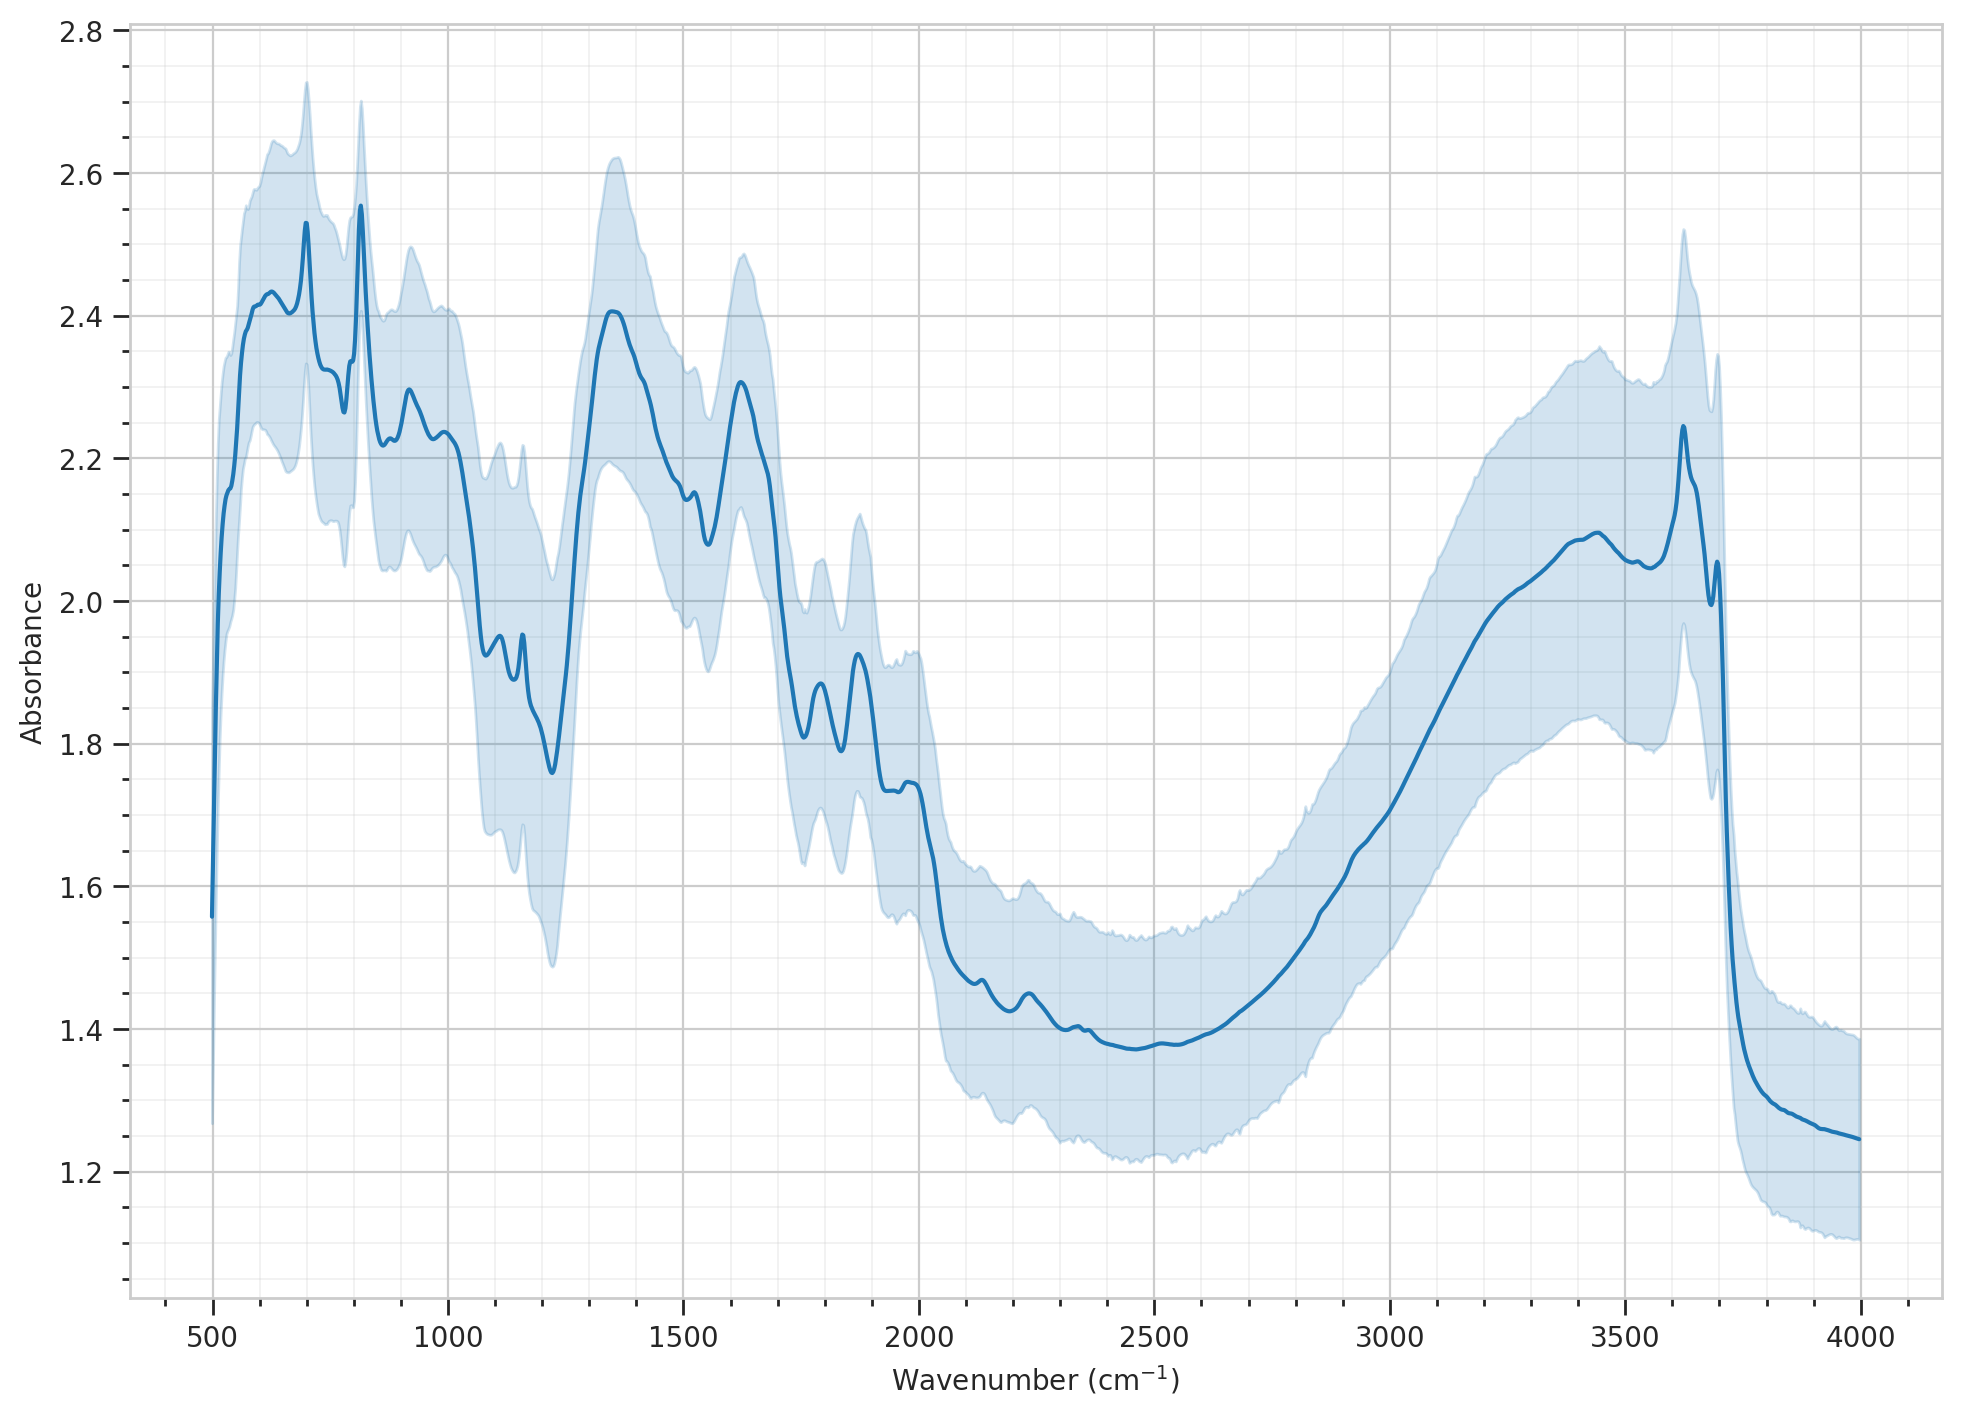

In [5]:
from spectraxai.explain import PreHocAnalysis
dataset.X_names = [round(float(key), 2) for key in dataset.X_names]
xai = PreHocAnalysis(dataset)
ax = xai.mean_spectrum()
ax.set_ylabel("Absorbance")
ax.set_xlabel(r'Wavenumber (cm$^{-1}$)')

## Transforming wavenumbers to wavelengths

To transform the predefined Wavenumbers given in the dataset to wavelengths (in m), one can use the equation:
    
  $x  cm ^ {-1} = (10.000.000 / x)  nm$

In [6]:
dataset.X_names = [round(10e6 / float(key), 2) for key in dataset.X_names]

/opt/tljh/user/envs/sensors2021/lib/python3.10/site-packages/spectraxai/explain.py:333: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = seaborn.lineplot(


Text(0.5, 0, 'Wavelength (nm)')

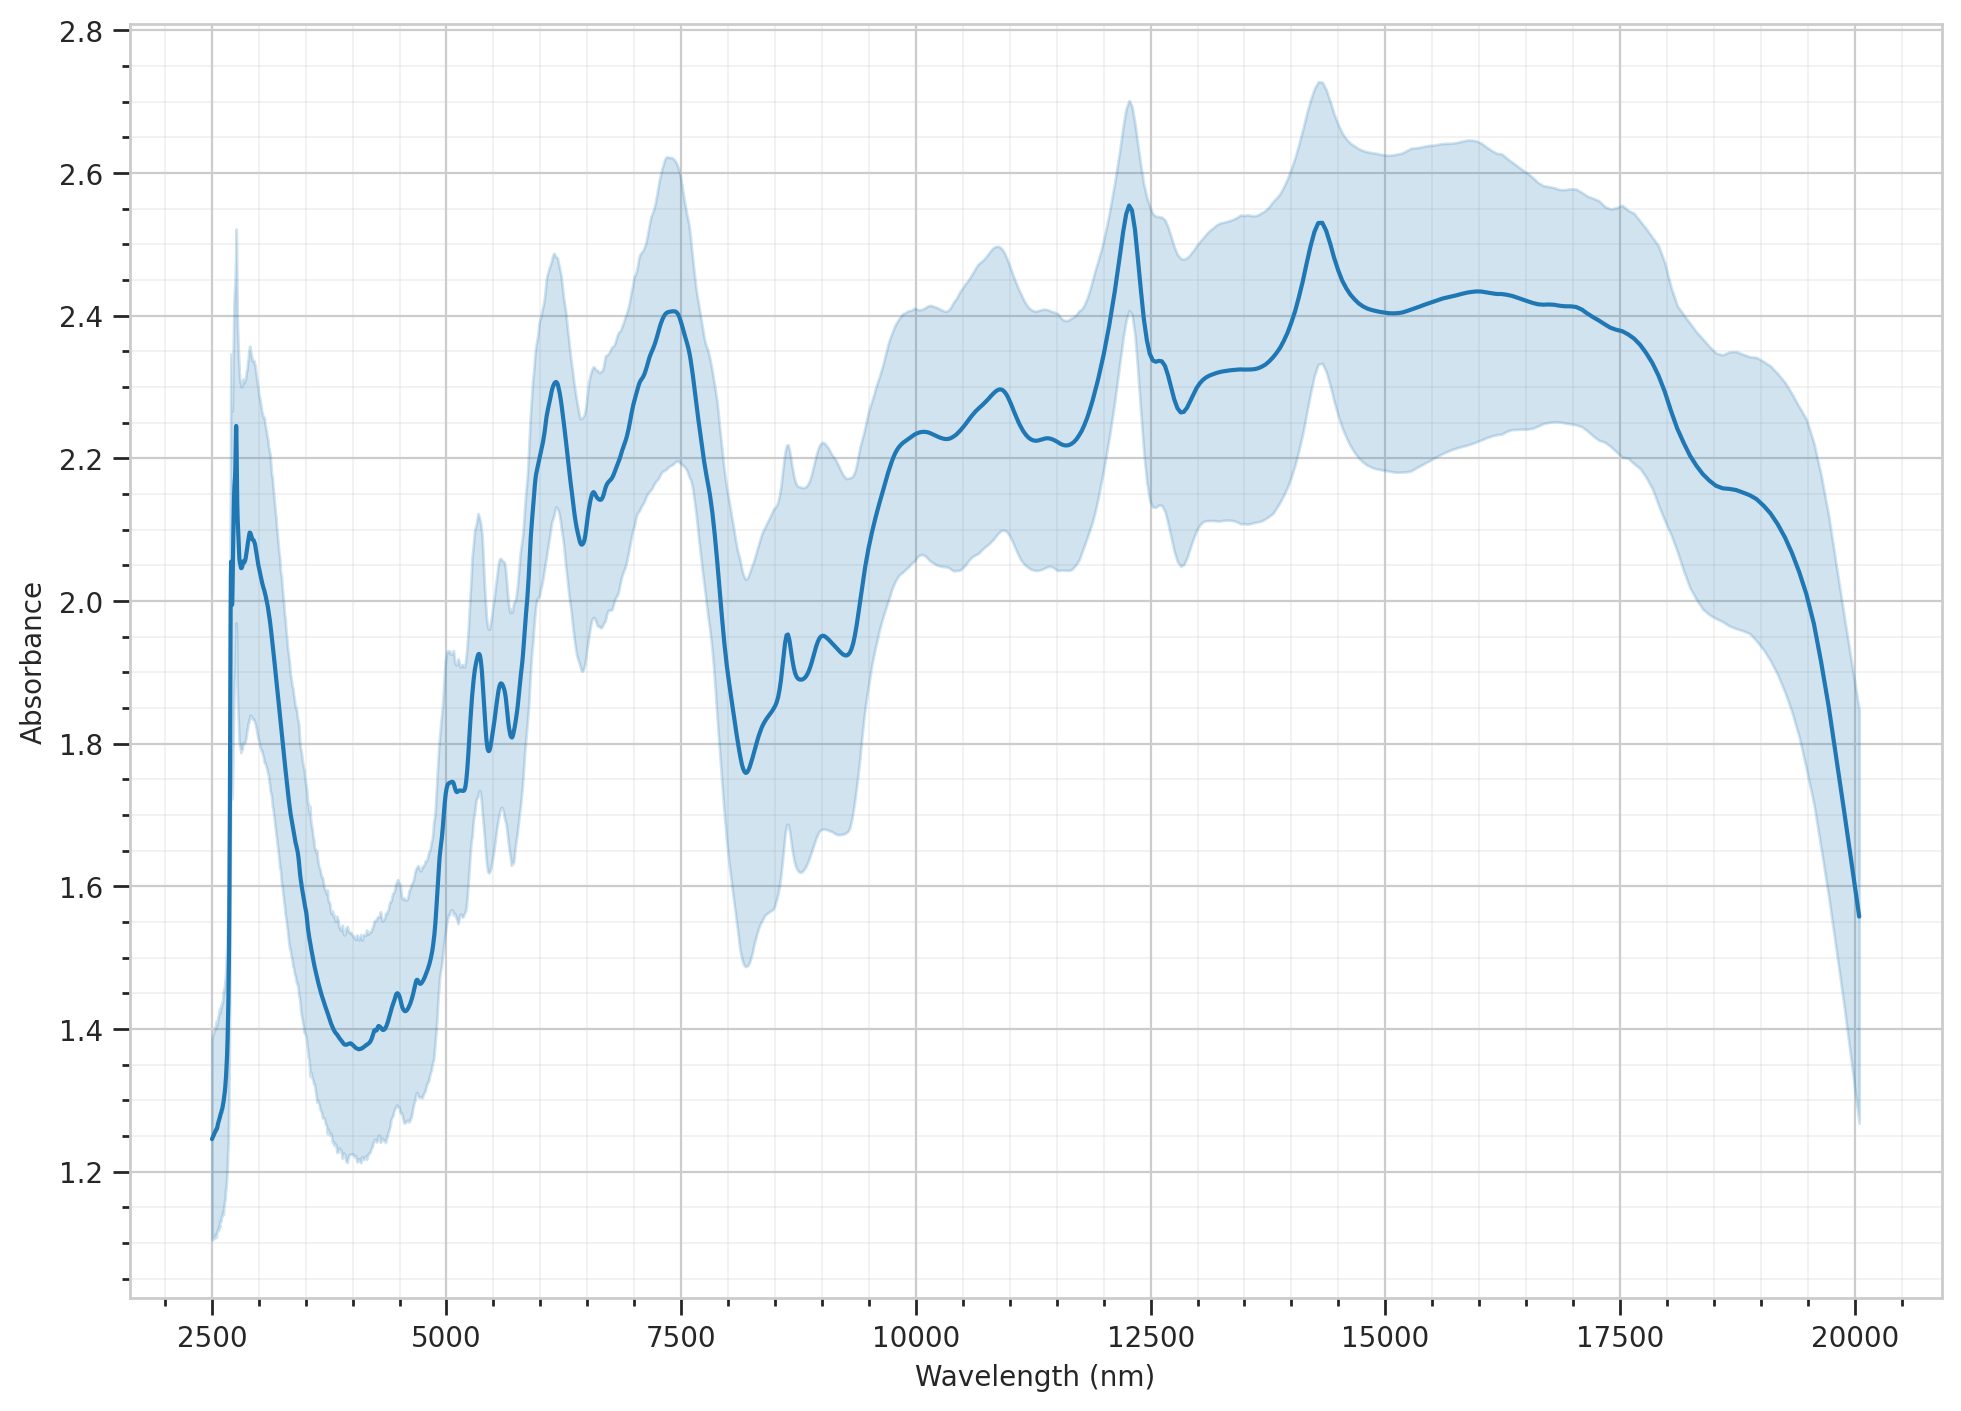

In [7]:
xai = PreHocAnalysis(dataset)
ax = xai.mean_spectrum()
ax.set_ylabel("Absorbance")
ax.set_xlabel('Wavelength (nm)')

## Beginner Level

For the Beginner Level demonstration, we will use as input data the Spectra wavelength from 3996.7 to 498.8 as shown above in order to train an ML model that predicts some of the soil properties defined in the dataset.

More specifically, we will try to predict Clay %, FiSa % and MeSa %.



In [8]:
clay = data['Clay (%)']
fisa = data['fiSa (%)']
mesa = data['meSa (%)']

Let's visualize the values of each target property.

### Property Distributions

* Clay % :

Text(0.5, 1.0, 'Clay distribution')

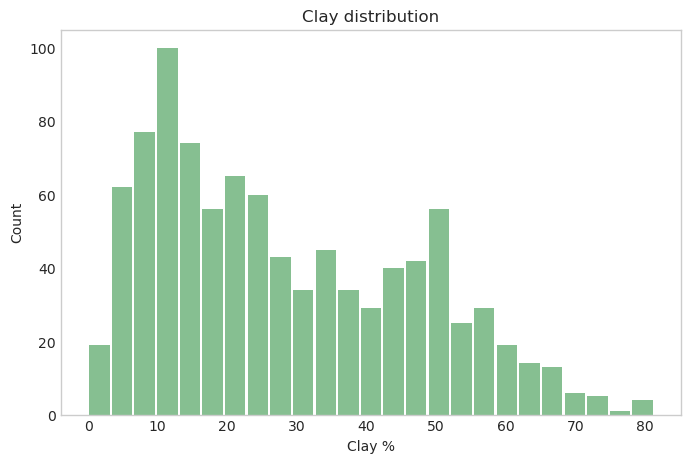

In [9]:
ax = clay.hist(bins=25, grid=False, figsize=(8,5), color='#86bf91', zorder=2, rwidth=0.9)
ax.set_xlabel('Clay %')
ax.set_ylabel('Count')
ax.set_title('Clay distribution')

In [10]:
clay.describe()

count    952.000000
mean      28.257038
std       18.401027
min        0.000000
25%       12.375000
50%       24.100000
75%       43.700000
max       81.300000
Name: Clay (%), dtype: float64

* FiSa (%):

Text(0.5, 1.0, 'FiSa distribution')

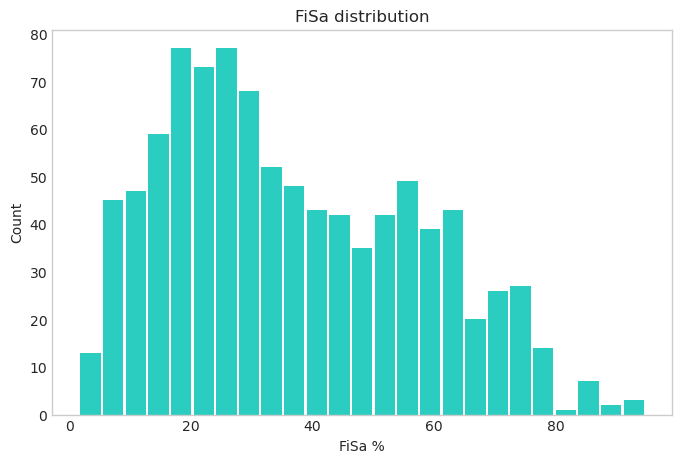

In [11]:
ax = fisa.hist( bins=25, grid=False, figsize=(8,5), color='#2bcdc1', zorder=2, rwidth=0.9)
ax.set_xlabel('FiSa %')
ax.set_ylabel('Count')
ax.set_title('FiSa distribution')

In [12]:
fisa.describe()

count    952.000000
mean      36.614181
std       20.403592
min        1.600000
25%       20.200000
50%       32.450000
75%       53.225000
max       94.700000
Name: fiSa (%), dtype: float64

* MeSa (%):

Text(0.5, 1.0, 'MeSa distribution')

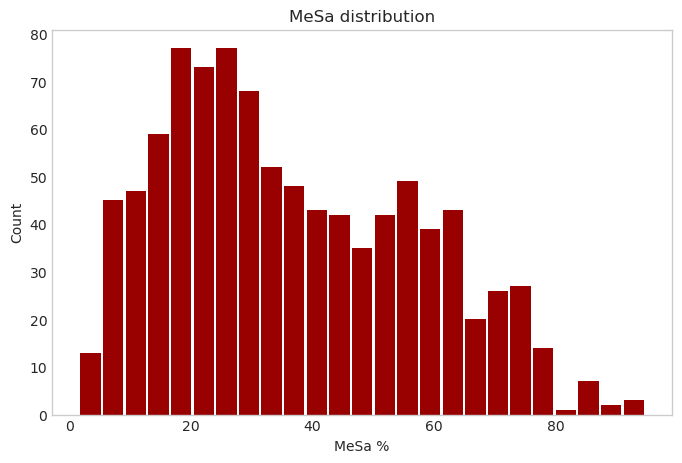

In [13]:
ax = fisa.hist( bins=25, grid=False, figsize=(8,5), color='#990000', zorder=2, rwidth=0.9)
ax.set_xlabel('MeSa %')
ax.set_ylabel('Count')
ax.set_title('MeSa distribution')

In [14]:
mesa.describe()

count    952.000000
mean      12.282878
std       10.232153
min        0.000000
25%        3.900000
50%        9.650000
75%       18.125000
max       57.600000
Name: meSa (%), dtype: float64

* We will try to predict the Clay %, FiSa % and MeSa % according to the spectra

* Using Spectraxai we create a spectraxai dataset and we split it with randomly into 80% training and 20% testing sets.

In [15]:
dataset_clay = Dataset(
    X=data.loc[:, "3996.7":"498.8"],
    X_names=data.loc[:, "3996.7":"498.8"].columns.to_list(),
    Y=clay,
    Y_names=["Clay (%)"]
)
dataset_clay.X_names = [round(10e6 / float(key), 2) for key in dataset_clay.X_names]

dataset_fisa = Dataset(
    X=data.loc[:, "3996.7":"498.8"],
    X_names=data.loc[:, "3996.7":"498.8"].columns.to_list(),
    Y=fisa,
    Y_names=["FiSa (%)"]
)
dataset_fisa.X_names = [round(10e6 / float(key), 2) for key in dataset_fisa.X_names]

dataset_mesa = Dataset(
    X=data.loc[:, "3996.7":"498.8"],
    X_names=data.loc[:, "3996.7":"498.8"].columns.to_list(),
    Y=mesa,
    Y_names=["MeSa (%)"]
)
dataset_mesa.X_names = [round(10e6 / float(key), 2) for key in dataset_mesa.X_names]

### Data splitting

In [16]:
from spectraxai.dataset import DatasetSplit

idx_trn_clay, idx_tst_clay = dataset_clay.train_test_split(DatasetSplit.RANDOM, 0.8)

* Let's see some statistics of each property dataset created.

For Clay training dataset:

Text(0.5, 1.0, 'Clay Train distribution')

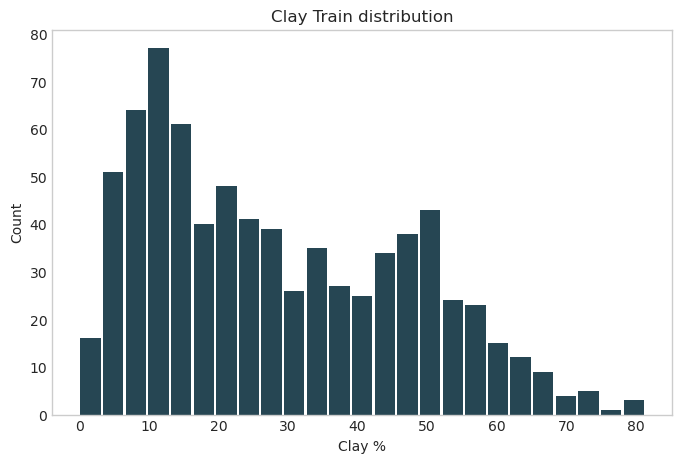

In [17]:
ax = clay[idx_trn_clay].hist( bins=25, grid=False, figsize=(8,5), color='#264653', zorder=2, rwidth=0.9)
ax.set_xlabel('Clay %')
ax.set_ylabel('Count')
ax.set_title('Clay Train distribution')

For Clay testing dataset:

Text(0.5, 1.0, 'Clay Test distribution')

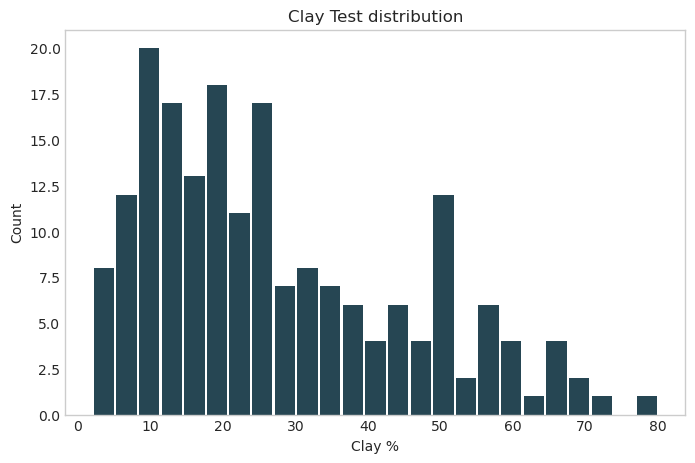

In [18]:
ax = clay[idx_tst_clay].hist( bins=25, grid=False, figsize=(8,5), color='#264653', zorder=2, rwidth=0.9)
ax.set_xlabel('Clay %')
ax.set_ylabel('Count')
ax.set_title('Clay Test distribution')

In [19]:
idx_trn_mesa, idx_tst_mesa = dataset_mesa.train_test_split(DatasetSplit.RANDOM, 0.8)

For MeSa training dataset:

Text(0.5, 1.0, 'MeSa Train distribution')

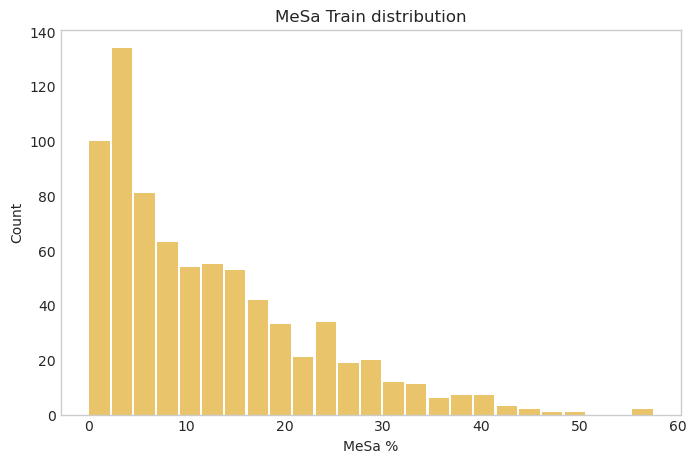

In [20]:
ax = mesa[idx_trn_mesa].hist( bins=25, grid=False, figsize=(8,5), color='#e9c46a', zorder=2, rwidth=0.9)
ax.set_xlabel('MeSa %')
ax.set_ylabel('Count')
ax.set_title('MeSa Train distribution')

For MeSa testing dataset:

Text(0.5, 1.0, 'MeSa Test distribution')

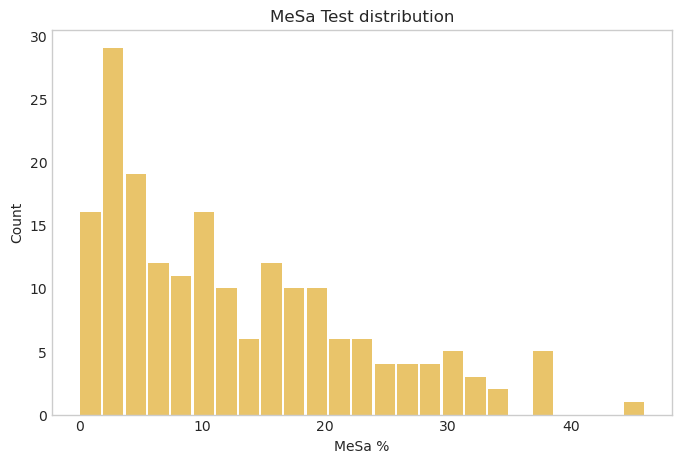

In [21]:
ax = mesa[idx_tst_mesa].hist( bins=25, grid=False, figsize=(8,5), color='#e9c46a', zorder=2, rwidth=0.9)
ax.set_xlabel('MeSa %')
ax.set_ylabel('Count')
ax.set_title('MeSa Test distribution')

In [22]:
idx_trn_fisa, idx_tst_fisa = dataset_fisa.train_test_split(DatasetSplit.RANDOM, 0.8)

For FiSa training dataset:

Text(0.5, 1.0, 'FiSa Train distribution')

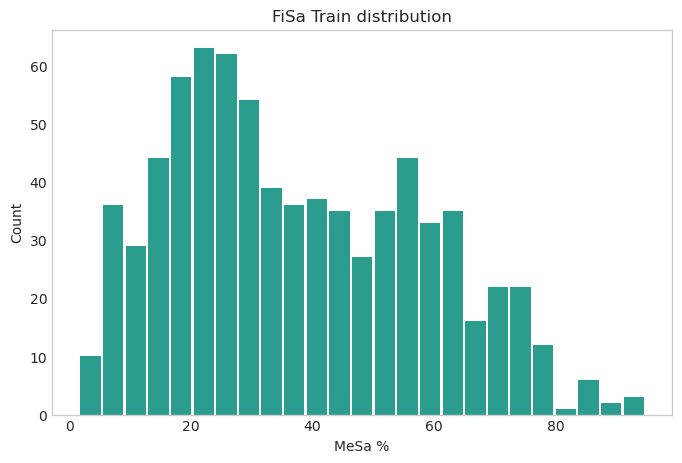

In [23]:
ax = fisa[idx_trn_fisa].hist( bins=25, grid=False, figsize=(8,5), color='#2a9d8f', zorder=2, rwidth=0.9)
ax.set_xlabel('MeSa %')
ax.set_ylabel('Count')
ax.set_title('FiSa Train distribution')

For FiSa testing dataset:

Text(0.5, 1.0, 'FiSa Test distribution')

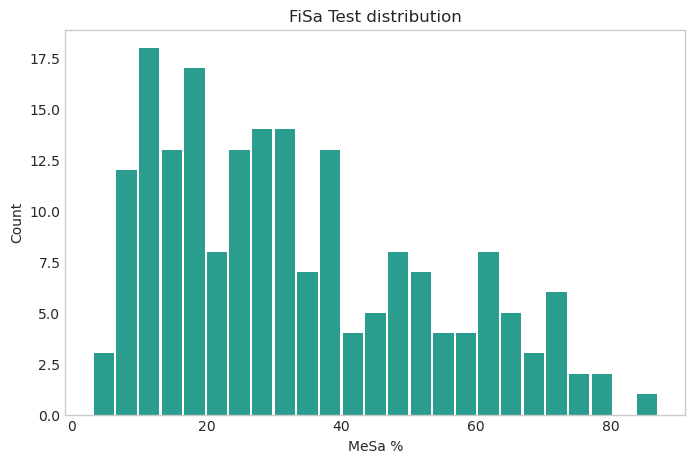

In [24]:
ax = fisa[idx_tst_fisa].hist( bins=25, grid=False, figsize=(8,5), color='#2a9d8f', zorder=2, rwidth=0.9)
ax.set_xlabel('MeSa %')
ax.set_ylabel('Count')
ax.set_title('FiSa Test distribution')

### Model training & predicting

* Now we will predict the Clay % by training an ML model using the Random Forest algorithm and evaluate the predictions according to the following  metrics:
    1) Root Mean Square Error (RMSE)
    2) R Squared (R2)
    3) Ratio of performance to Interquantile (RPIQ)

In [25]:
from spectraxai.models import StandardModel, Model

rf = StandardModel(Model.RF)

dataset_trn_clay = dataset_clay.subset(idx=idx_trn_clay)
dataset_tst_clay = dataset_clay.subset(idx=idx_tst_clay)

rf.fit(dataset_trn_clay)

In [26]:
y_hat = rf.predict(dataset_tst_clay.X)

For more detailed information of the prediction results, we will visualize a scatter plot:
* Scatter plots visualize the difference between the predicted values with the observed (or true values)  ones. The dashed line represents the perfect prediction while the blue line the predictions that were actually done.

Text(0, 0.5, 'Clay % Predicted')

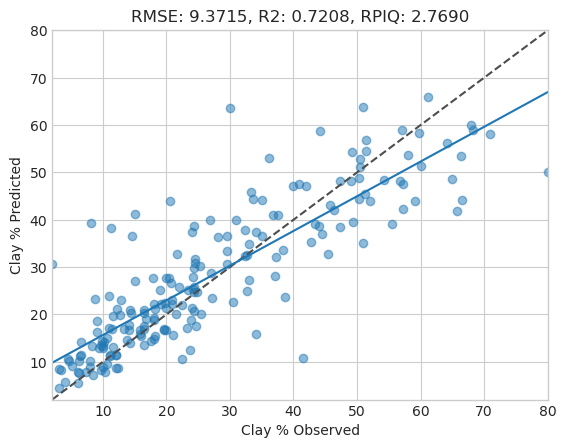

In [27]:
from spectraxai.utils._model_assessment import scatter_plot

ax = scatter_plot(dataset_tst_clay.Y[:,0],y_hat)
ax.set_xlabel('Clay % Observed')
ax.set_ylabel('Clay % Predicted')

Let's predict FiSa (%).

In [28]:
dataset_trn_fisa = dataset_fisa.subset(idx=idx_trn_fisa)
dataset_tst_fisa = dataset_fisa.subset(idx=idx_tst_fisa)

rf.fit(dataset_trn_fisa)

In [29]:
y_hat = rf.predict(dataset_tst_fisa.X)

Text(0, 0.5, 'FiSa % Predicted')

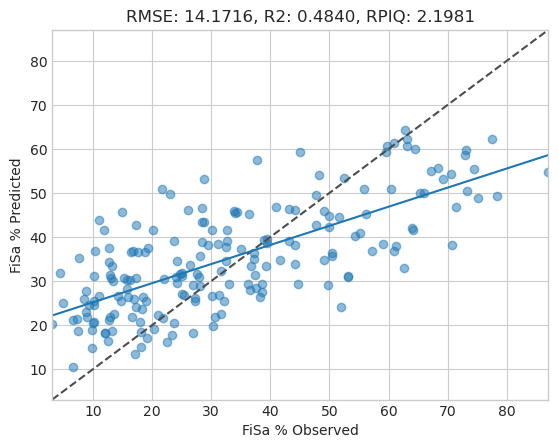

In [30]:
ax = scatter_plot(dataset_tst_fisa.Y[:,0],y_hat)
ax.set_xlabel('FiSa % Observed')
ax.set_ylabel('FiSa % Predicted')

Let's predict MeSa (%).

Text(0, 0.5, 'MeSa % Predicted')

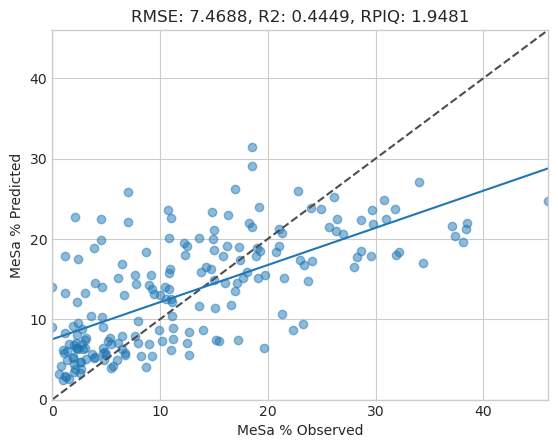

In [31]:
dataset_trn_mesa = dataset_mesa.subset(idx=idx_trn_mesa)
dataset_tst_mesa = dataset_mesa.subset(idx=idx_tst_mesa)

rf.fit(dataset_trn_mesa)

y_hat = rf.predict(dataset_tst_mesa.X)

ax = scatter_plot(dataset_tst_mesa.Y[:,0],y_hat)
ax.set_xlabel('MeSa % Observed')
ax.set_ylabel('MeSa % Predicted')

## Intermediate Level

In the intermediate Level, we will upgrade the former pipeline in order to get more predictions
using different preprocessing techniques and more ML algorithms to train the model.

* Dataset Split Cross Validation with 5 folds:

During Cross Validation the dataset is split into 5 different ways to reassure that all data were part of the training or the test dataset. In the Figure an example is demonstrated of how a dataset can be split with Cross Validation into 5 folds. Each fold is used for predictions and the results then can be compared. 


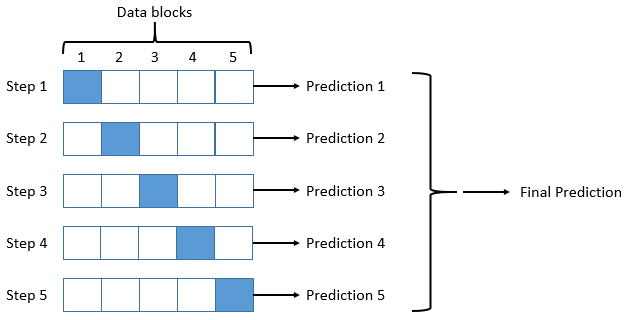


Additionally, in this part we will test a preprocessing method of transforming the previous spectra from Reflectance to Standard Normal Variate. Various preprocessing techniques, transform spectra into a distinct form, giving the chance to the model to find hidden paterns.

### Random Forest

In [32]:
idx_trn_clay, idx_tst_clay = dataset_clay.train_test_split(DatasetSplit.CROSS_VALIDATION, 5)

For Clay:

In [33]:
from spectraxai.spectra import SpectralPreprocessing 

preprocesses = [
    [
        SpectralPreprocessing.NONE
    ],
    [
        SpectralPreprocessing.SNV
    ]
    
]

rf = StandardModel(Model.RF)
rf.fit_and_predict_multiple(dataset_clay, preprocesses=preprocesses, idx_trn=idx_trn_clay)

,N,RMSE,R2,RPIQ,output,pre_process,val_score,max_features,n_estimators,feature_importance,training_time,testing_time,fold
0,191,8.503749,0.789193,3.663090,Clay (%),[no],0.790189,sqrt,150,"[0.00010269997128571654, 5.431984499178875e-05...",86.680741,0.017518,1
1,191,8.348190,0.772833,3.174341,Clay (%),[no],0.786171,sqrt,200,"[2.353371051789618e-05, 0.00011202557480184035...",81.027941,0.018124,2
2,190,8.716309,0.785736,3.433219,Clay (%),[no],0.788021,sqrt,100,"[2.2102589961232884e-05, 0.0002240879002924561...",81.193116,0.013859,3
3,190,8.261663,0.804989,3.876338,Clay (%),[no],0.782362,sqrt,200,"[9.1022697179955e-05, 2.56382686547493e-05, 3....",98.215626,0.026167,4
4,190,8.133563,0.800705,4.008084,Clay (%),[no],0.786487,sqrt,200,"[2.373611092502617e-05, 4.031263260406585e-05,...",82.193160,0.039477,5
5,191,8.276004,0.800333,3.763894,Clay (%),[SNV],0.812314,sqrt,100,"[4.3898498962802166e-05, 0.0002888915901856026...",72.629229,0.008848,1
6,191,8.161157,0.782898,3.247088,Clay (%),[SNV],0.808187,sqrt,200,"[0.00012568572138555446, 0.0001189044401555961...",101.840709,0.018282,2
7,190,8.180091,0.811287,3.658272,Clay (%),[SNV],0.804977,sqrt,150,"[0.0001586614840188435, 0.00017384303342674203...",85.966147,0.013486,3
8,190,8.049561,0.814873,3.978478,Clay (%),[SNV],0.803465,log2,100,"[8.964114161348222e-05, 3.583807433491401e-05,...",84.199746,0.013400,4
9,190,7.939291,0.810112,4.106160,Clay (%),[SNV],0.809958,sqrt,200,"[5.566008987368145e-05, 8.539538558708725e-05,...",78.744724,0.025418,5


In [34]:
res = rf.fit_and_predict_multiple(dataset_clay, preprocesses=preprocesses, idx_trn=idx_trn_clay)
res.groupby('pre_process').mean()

/tmp/ipykernel_4026878/638494301.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res.groupby('pre_process').mean()


,N,RMSE,R2,RPIQ,val_score,n_estimators,training_time,testing_time,fold
pre_process,,,,,,,,,
[SNV],190.4,8.115365,0.804068,3.753916,0.808752,170.0,97.634275,0.018790,3.0
[no],190.4,8.339350,0.793337,3.655201,0.786869,160.0,82.126293,0.020627,3.0


For FiSa:

In [35]:
idx_trn_fisa, idx_tst_fisa = dataset_fisa.train_test_split(DatasetSplit.CROSS_VALIDATION, 5)
res = rf.fit_and_predict_multiple(dataset_fisa, preprocesses=preprocesses, idx_trn=idx_trn_fisa)
res.groupby('pre_process').mean()

/tmp/ipykernel_4026878/1175113227.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res.groupby('pre_process').mean()


,N,RMSE,R2,RPIQ,val_score,n_estimators,training_time,testing_time,fold
pre_process,,,,,,,,,
[SNV],190.4,13.278578,0.575195,2.490392,0.562386,120.0,89.941644,0.013641,3.0
[no],190.4,14.636196,0.483513,2.258912,0.476055,160.0,88.889149,0.023104,3.0


For MeSa:

In [36]:
idx_trn_mesa, idx_tst_mesa = dataset_mesa.train_test_split(DatasetSplit.CROSS_VALIDATION, 5)
res = rf.fit_and_predict_multiple(dataset_mesa, preprocesses=preprocesses, idx_trn=idx_trn_mesa)
res.groupby('pre_process').mean()

/tmp/ipykernel_4026878/139233908.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res.groupby('pre_process').mean()


,N,RMSE,R2,RPIQ,val_score,n_estimators,training_time,testing_time,fold
pre_process,,,,,,,,,
[SNV],190.4,7.113788,0.513025,1.995605,0.505402,160.0,112.941010,0.044532,3.0
[no],190.4,7.682967,0.431544,1.847744,0.429398,150.0,114.586048,0.013738,3.0


### Partial Least Squares:

For Clay:

In [37]:
pls = StandardModel(Model.PLS)
res = pls.fit_and_predict_multiple(dataset_clay, preprocesses=preprocesses, idx_trn=idx_trn_clay)
res.groupby('pre_process').mean()

/tmp/ipykernel_4026878/4252612473.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res.groupby('pre_process').mean()


,N,RMSE,R2,RPIQ,val_score,n_components,training_time,testing_time,fold
pre_process,,,,,,,,,
[SNV],190.4,9.310881,0.734988,3.365042,0.780242,18.8,57.850153,0.011071,3.0
[no],190.4,8.349668,0.792436,3.655911,0.810041,13.4,44.765954,0.002080,3.0


For FiSa:

In [38]:
res = pls.fit_and_predict_multiple(dataset_fisa, preprocesses=preprocesses, idx_trn=idx_trn_fisa)
res.groupby('pre_process').mean()

/tmp/ipykernel_4026878/3152690788.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res.groupby('pre_process').mean()


,N,RMSE,R2,RPIQ,val_score,n_components,training_time,testing_time,fold
pre_process,,,,,,,,,
[SNV],190.4,14.838447,0.462824,2.268906,0.490113,15.2,46.615105,0.004543,3.0
[no],190.4,14.020386,0.526145,2.360223,0.529466,14.8,100.501261,0.009921,3.0


For MeSa:

In [39]:
res = pls.fit_and_predict_multiple(dataset_mesa, preprocesses=preprocesses, idx_trn=idx_trn_mesa)
res.groupby('pre_process').mean()

/tmp/ipykernel_4026878/1642341000.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res.groupby('pre_process').mean()


,N,RMSE,R2,RPIQ,val_score,n_components,training_time,testing_time,fold
pre_process,,,,,,,,,
[SNV],190.4,7.572935,0.448795,1.873230,0.449640,15.2,45.868297,0.002771,3.0
[no],190.4,8.152074,0.357004,1.749563,0.422232,10.0,46.404784,0.004112,3.0


### Support Vector Reggressor

For Clay:

In [40]:
svr = StandardModel(Model.SVR)
res = svr.fit_and_predict_multiple(dataset_clay, preprocesses=preprocesses, idx_trn=idx_trn_clay)
res.groupby('pre_process').mean()

/tmp/ipykernel_4026878/4170650526.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res.groupby('pre_process').mean()


,N,RMSE,R2,RPIQ,val_score,C,epsilon,gamma,SVs,training_time,testing_time,fold
pre_process,,,,,,,,,,,,
[SNV],190.4,7.284377,0.842020,4.188201,0.845516,166.4,0.44,0.000192,702.4,237.045646,0.140864,3.0
[no],190.4,7.486799,0.832883,4.081093,0.832496,256.0,0.44,0.000192,705.2,238.711731,0.173147,3.0


For FiSa:

In [41]:
res = svr.fit_and_predict_multiple(dataset_fisa, preprocesses=preprocesses, idx_trn=idx_trn_fisa)
res.groupby('pre_process').mean()

/tmp/ipykernel_4026878/4007439580.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res.groupby('pre_process').mean()


,N,RMSE,R2,RPIQ,val_score,C,epsilon,gamma,SVs,training_time,testing_time,fold
pre_process,,,,,,,,,,,,
[SNV],190.4,12.442048,0.627039,2.655905,0.623522,140.8,0.5,0.000285,731.2,246.300286,0.128201,3.0
[no],190.4,12.976183,0.593826,2.546645,0.583808,384.0,0.5,0.000471,735.0,251.395044,0.185895,3.0


For MeSa:

In [42]:
res = svr.fit_and_predict_multiple(dataset_mesa, preprocesses=preprocesses, idx_trn=idx_trn_mesa)
res.groupby('pre_process').mean()

/tmp/ipykernel_4026878/3466533687.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res.groupby('pre_process').mean()


,N,RMSE,R2,RPIQ,val_score,C,epsilon,gamma,SVs,training_time,testing_time,fold
pre_process,,,,,,,,,,,,
[SNV],190.4,7.046261,0.521653,2.017186,0.516743,102.4,0.312,0.000192,717.8,238.190273,0.135339,3.0
[no],190.4,7.533754,0.454466,1.886348,0.468357,153.6,0.370,0.000378,714.2,237.769269,0.131760,3.0


## Expert Level

At this Level, we will try to better understand our dataset using various Pre and Post Hoc analysis.

* Pre Hoc Analysis of the dataset:

The first step is to view the correlation of each feature of the dataset according to the preprocessing. In order to achieve that, **Pearson's correlation** is applied which indicates the description of the relationship between the property and the preprocessing. When Pearson's Correlation is 1, the two features are highly correlated and when it is -1, the features are irrelevant.

Text(236.16666666666666, 0.5, 'Clay')

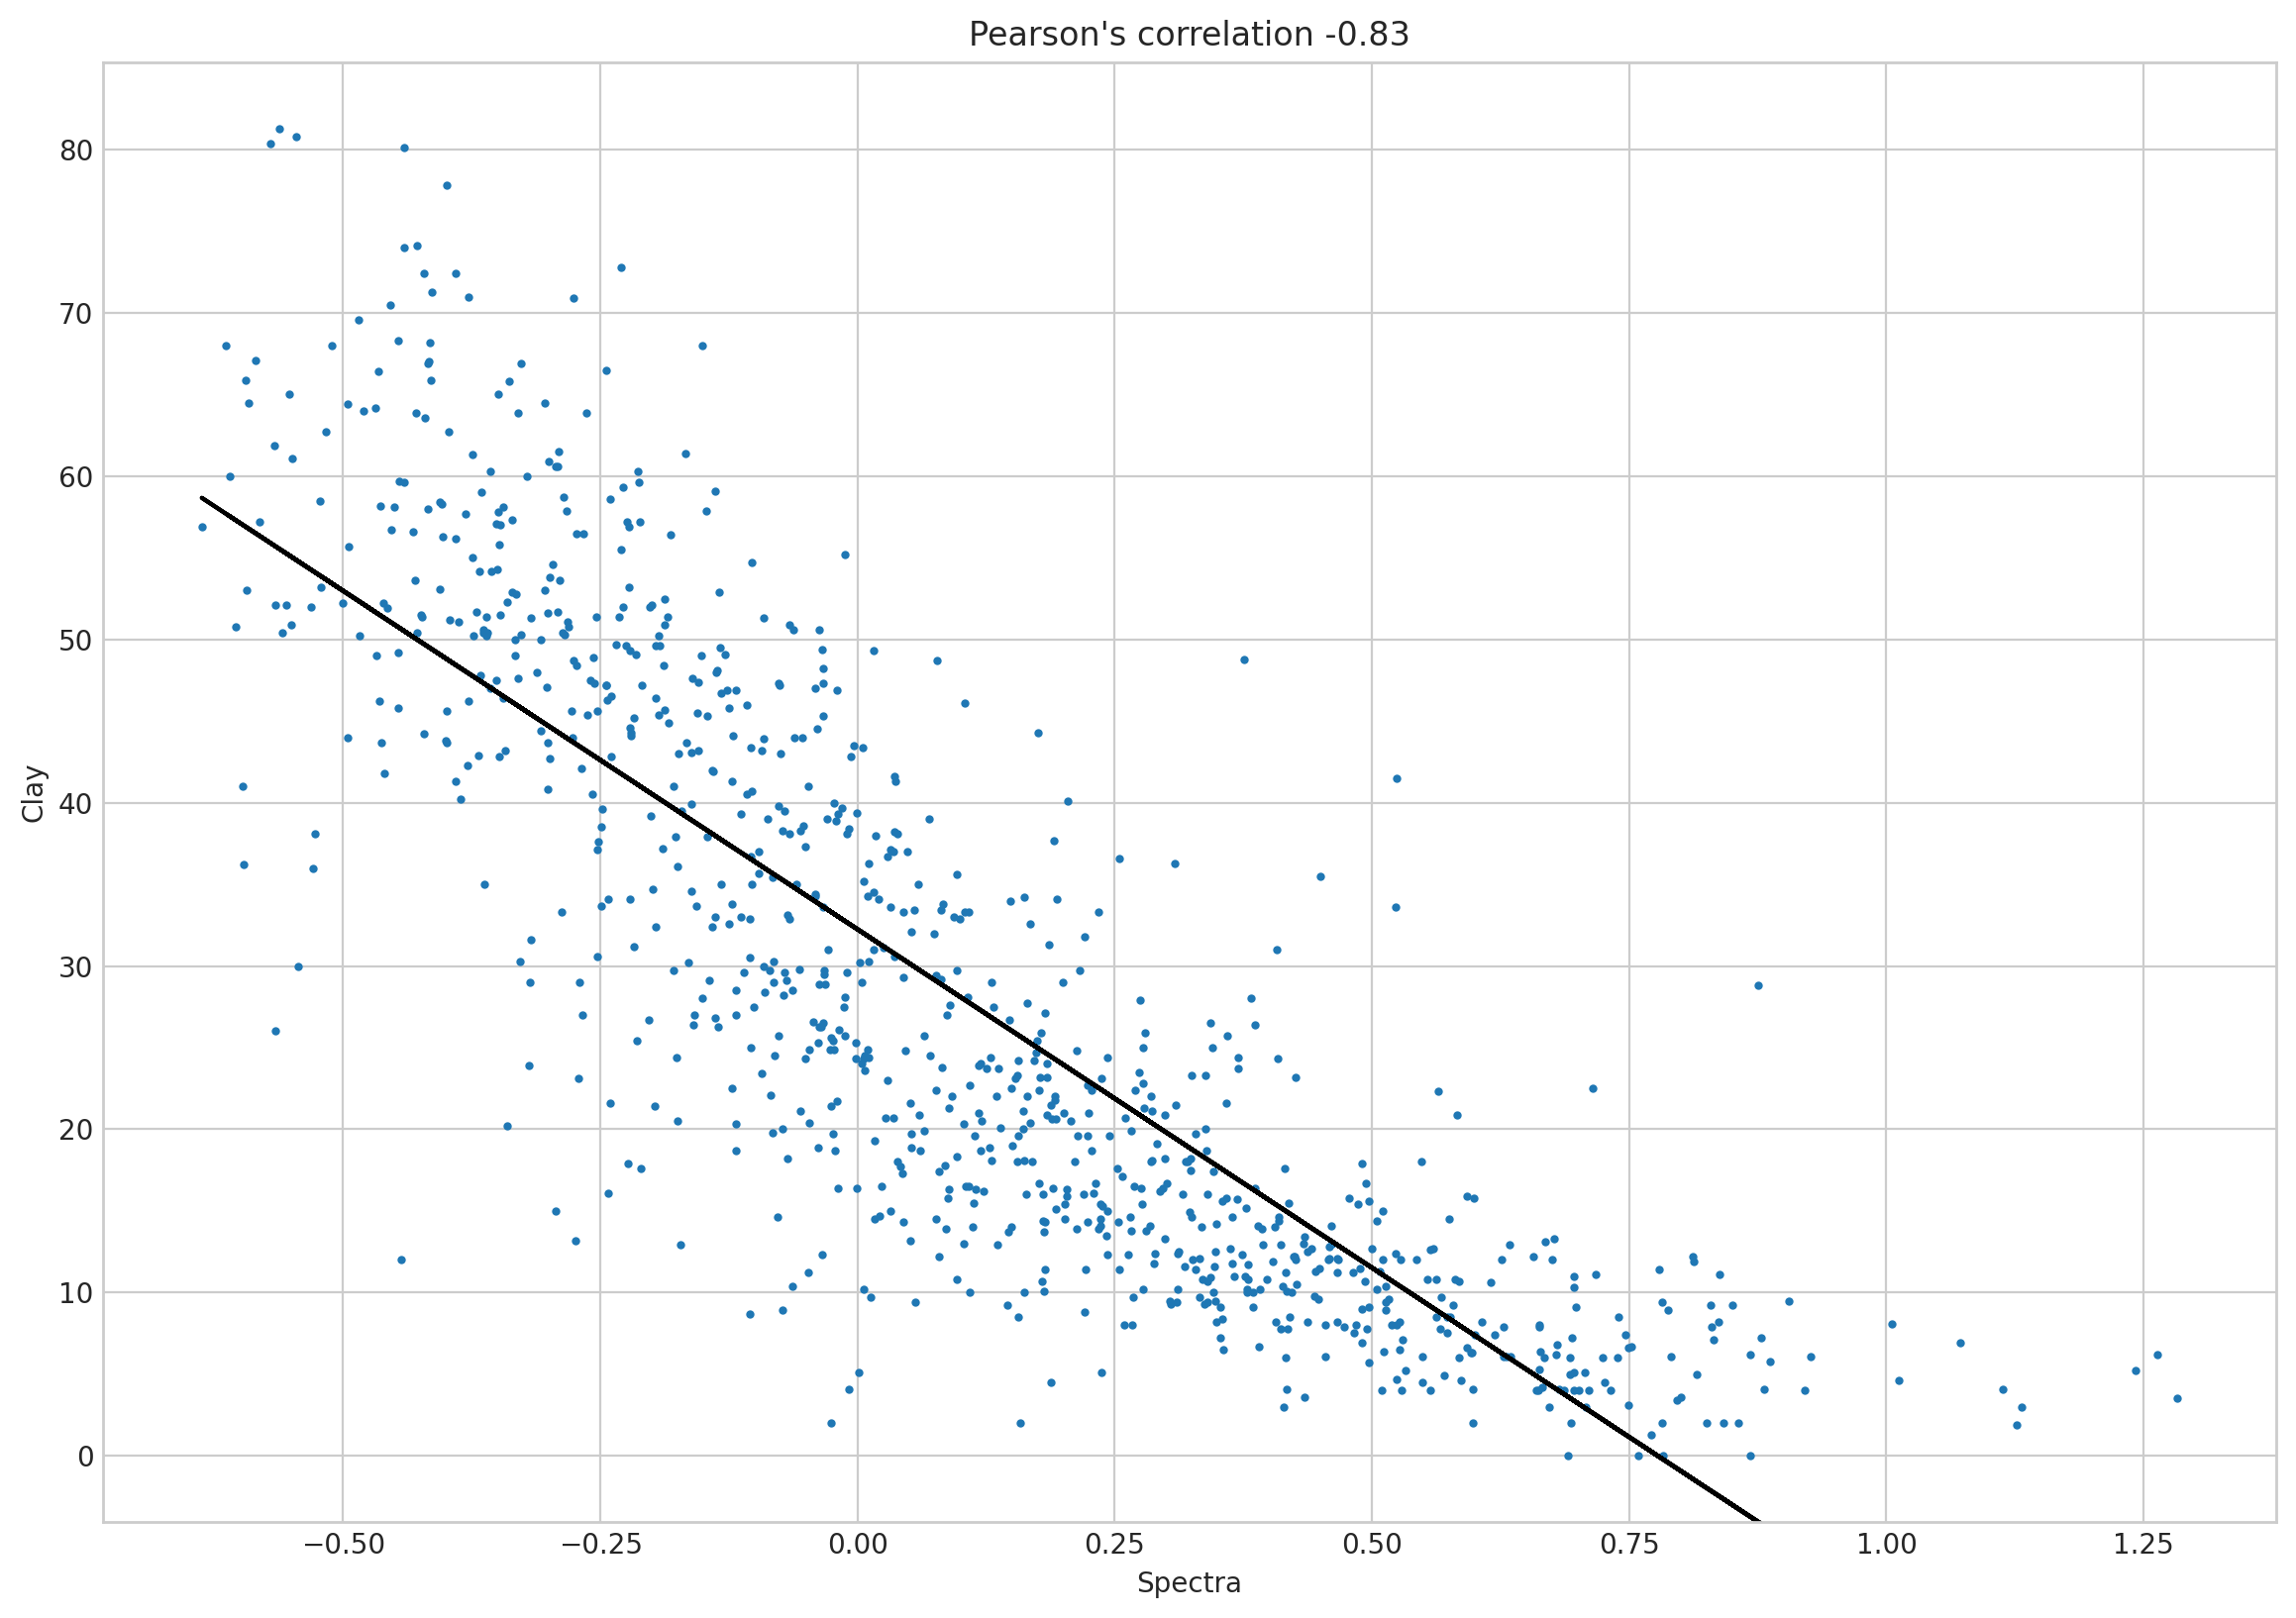

In [43]:
xai = PreHocAnalysis(dataset_clay.preprocess([SpectralPreprocessing.SNV]))
axes = xai.correlogram(top=1)
axes[0, 0].set_xlabel('Spectra')
axes[0, 0].set_ylabel('Clay')

For the Clay property, it is demonstrated that preprocessing plays a vital role in the correlation of the features and consequently to the final predictions.

Text(236.16666666666666, 0.5, 'FiSa')

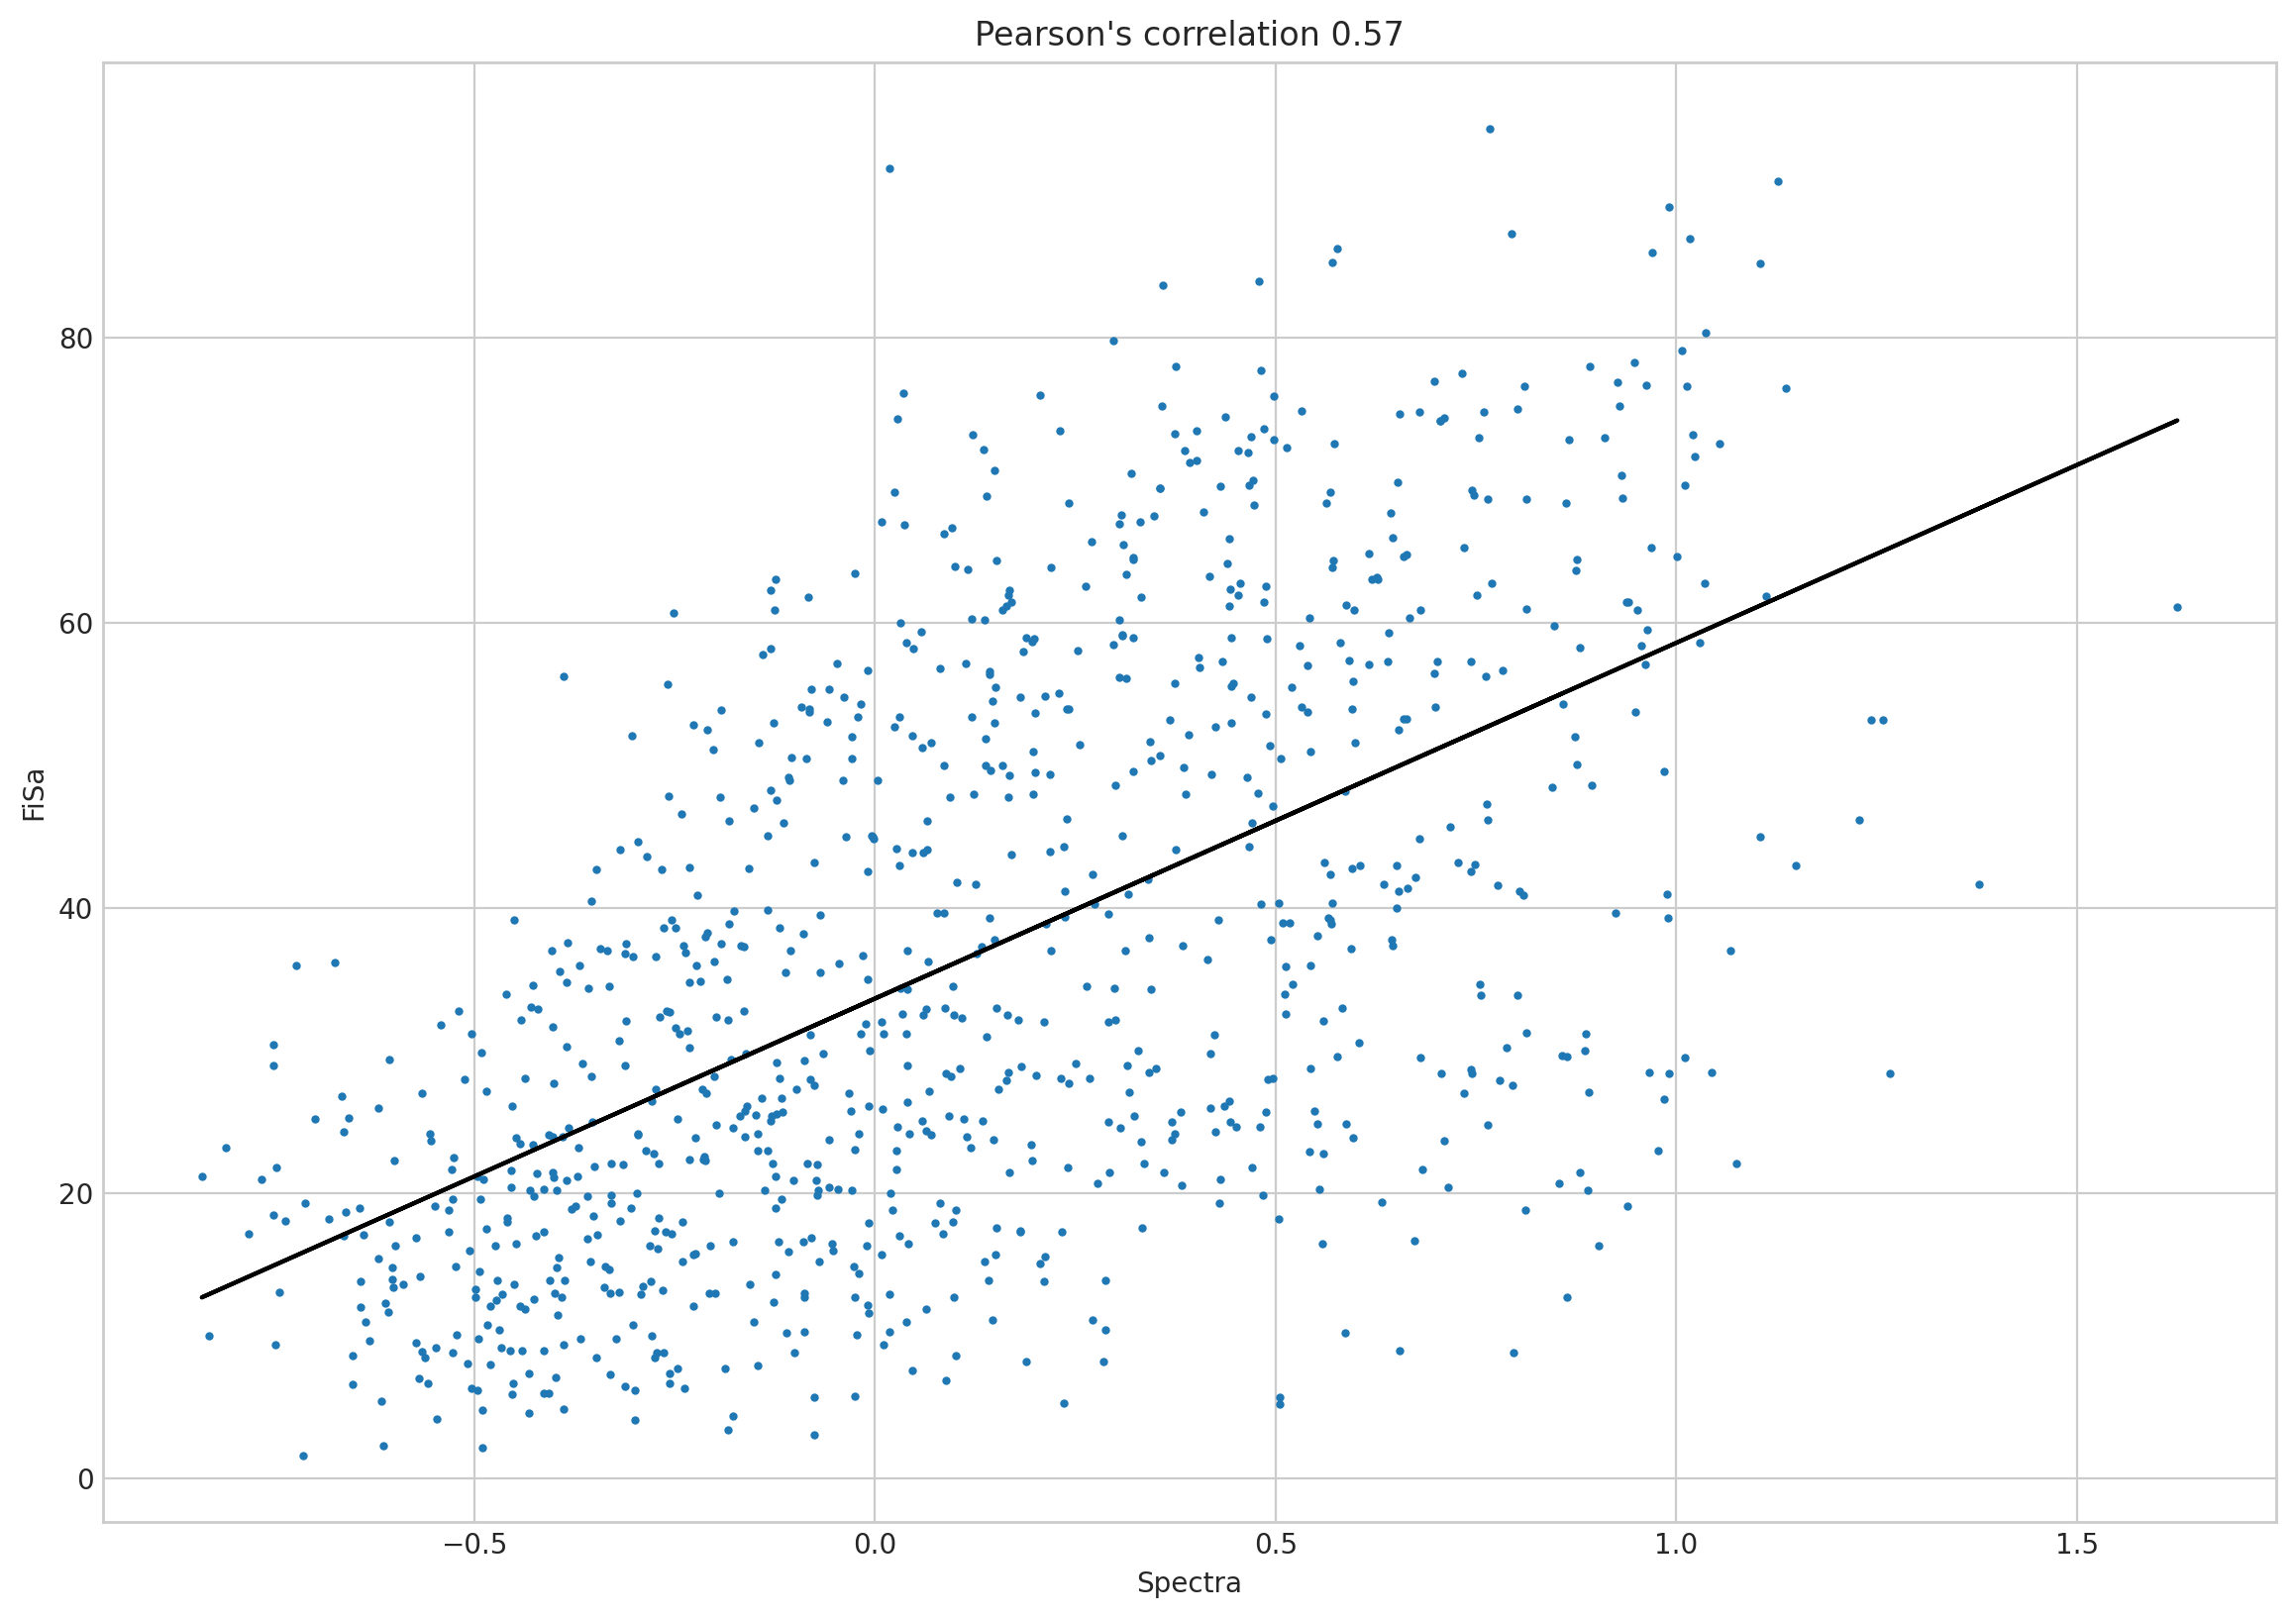

In [44]:
xai = PreHocAnalysis(dataset_fisa.preprocess([SpectralPreprocessing.SNV]))
axes = xai.correlogram(top=1)
axes[0, 0].set_xlabel('Spectra')
axes[0, 0].set_ylabel('FiSa')

For the FiSa property preprocessing does not indicate any significant relevance with the property.

Text(236.16666666666666, 0.5, 'MeSa')

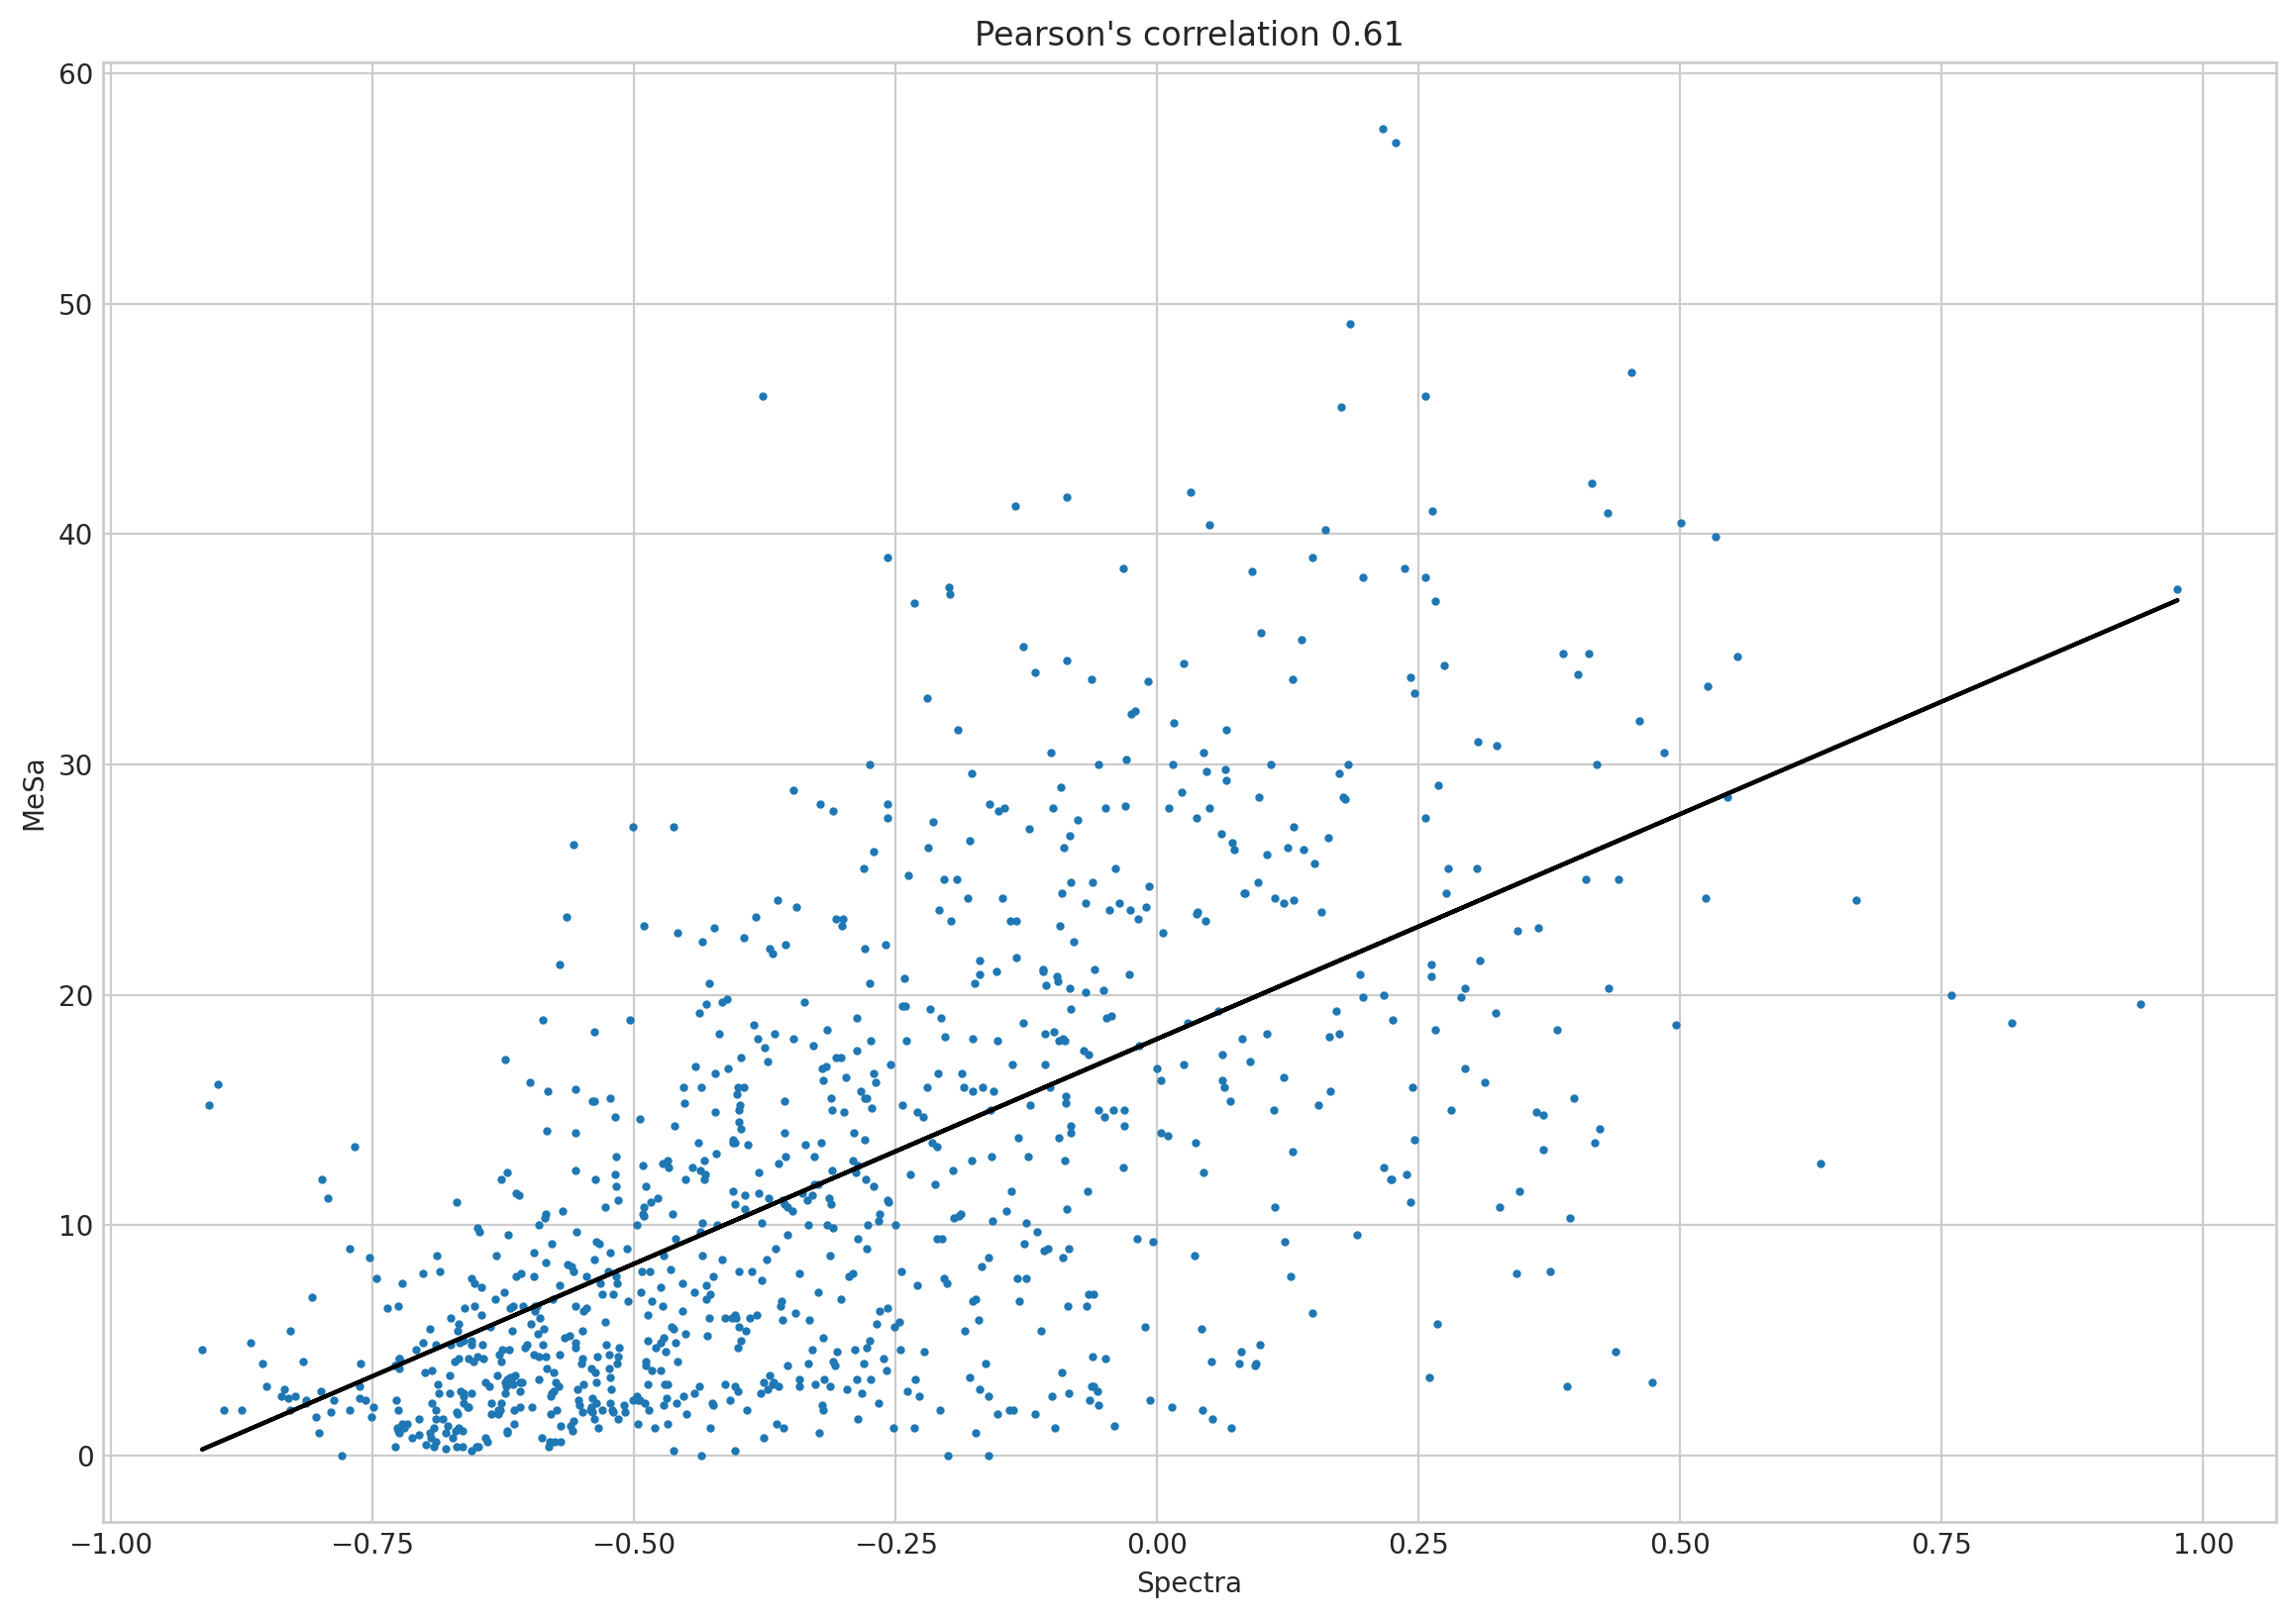

In [45]:
xai = PreHocAnalysis(dataset_mesa.preprocess([SpectralPreprocessing.SNV]))
axes = xai.correlogram(top=1)
axes[0, 0].set_xlabel('Spectra')
axes[0, 0].set_ylabel('MeSa')

As the FiSa, the same view can be seen in MeSa property.

Next step is to demonstrate the feature importance of each nm of the wavelength in the each property prediction.

Text(0.5, 1.0, 'Clay Feature Importance')

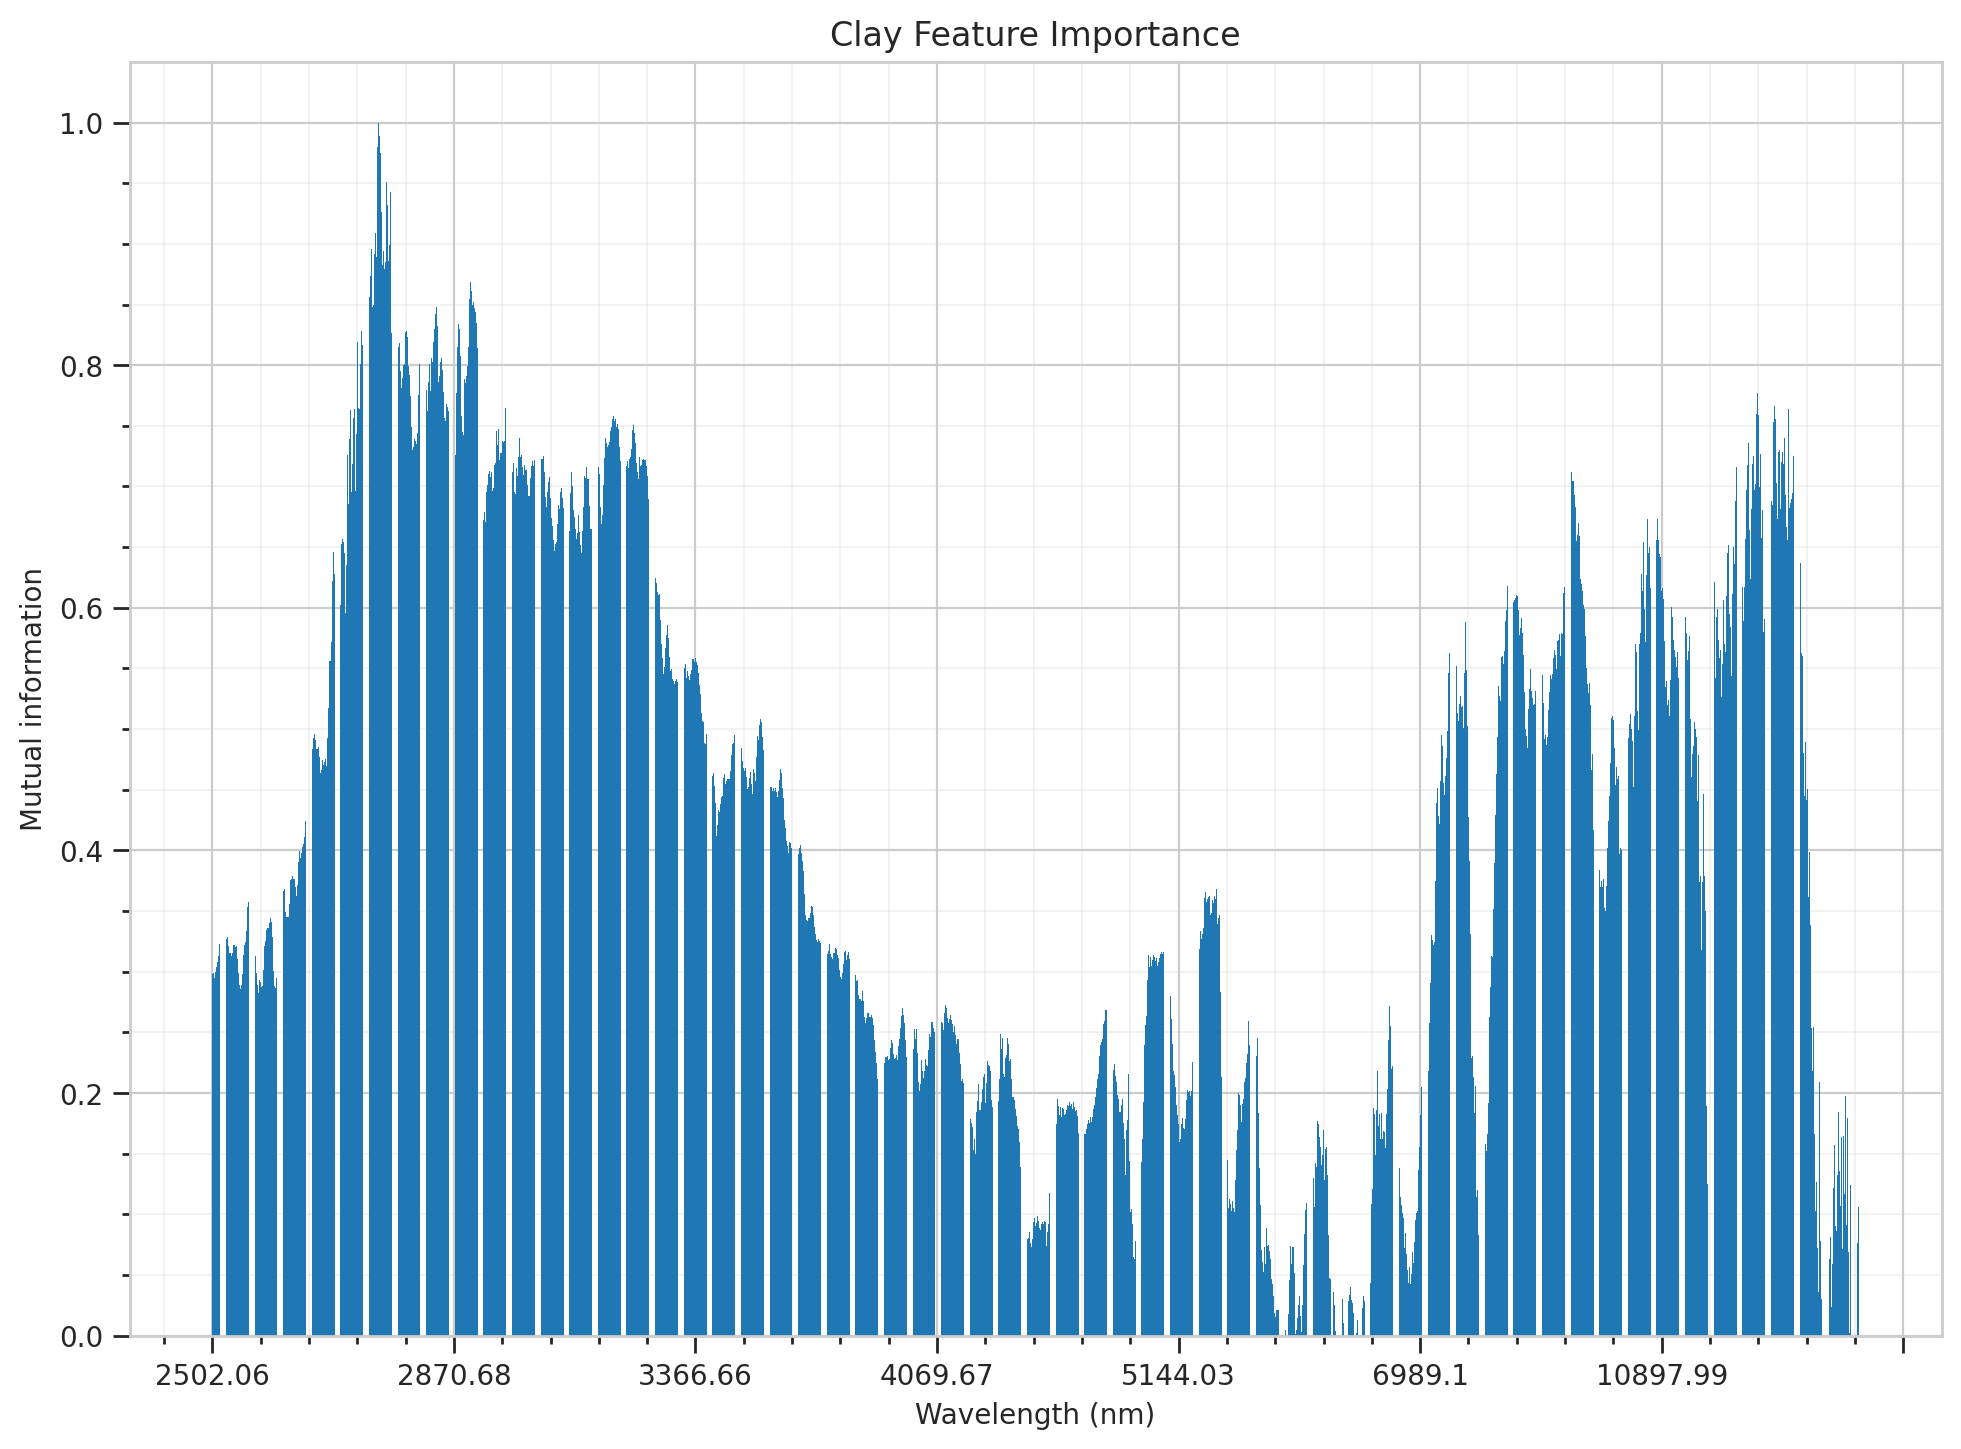

In [46]:
from spectraxai.explain import FeatureRanking

xai = PreHocAnalysis(dataset_clay)
axes = xai.bar_plot_importance(method=FeatureRanking.MI)
axes[0].set_xlabel('Wavelength (nm)')
axes[0].set_title('Clay Feature Importance')

Text(0.5, 1.0, 'FiSa Feature Importance')

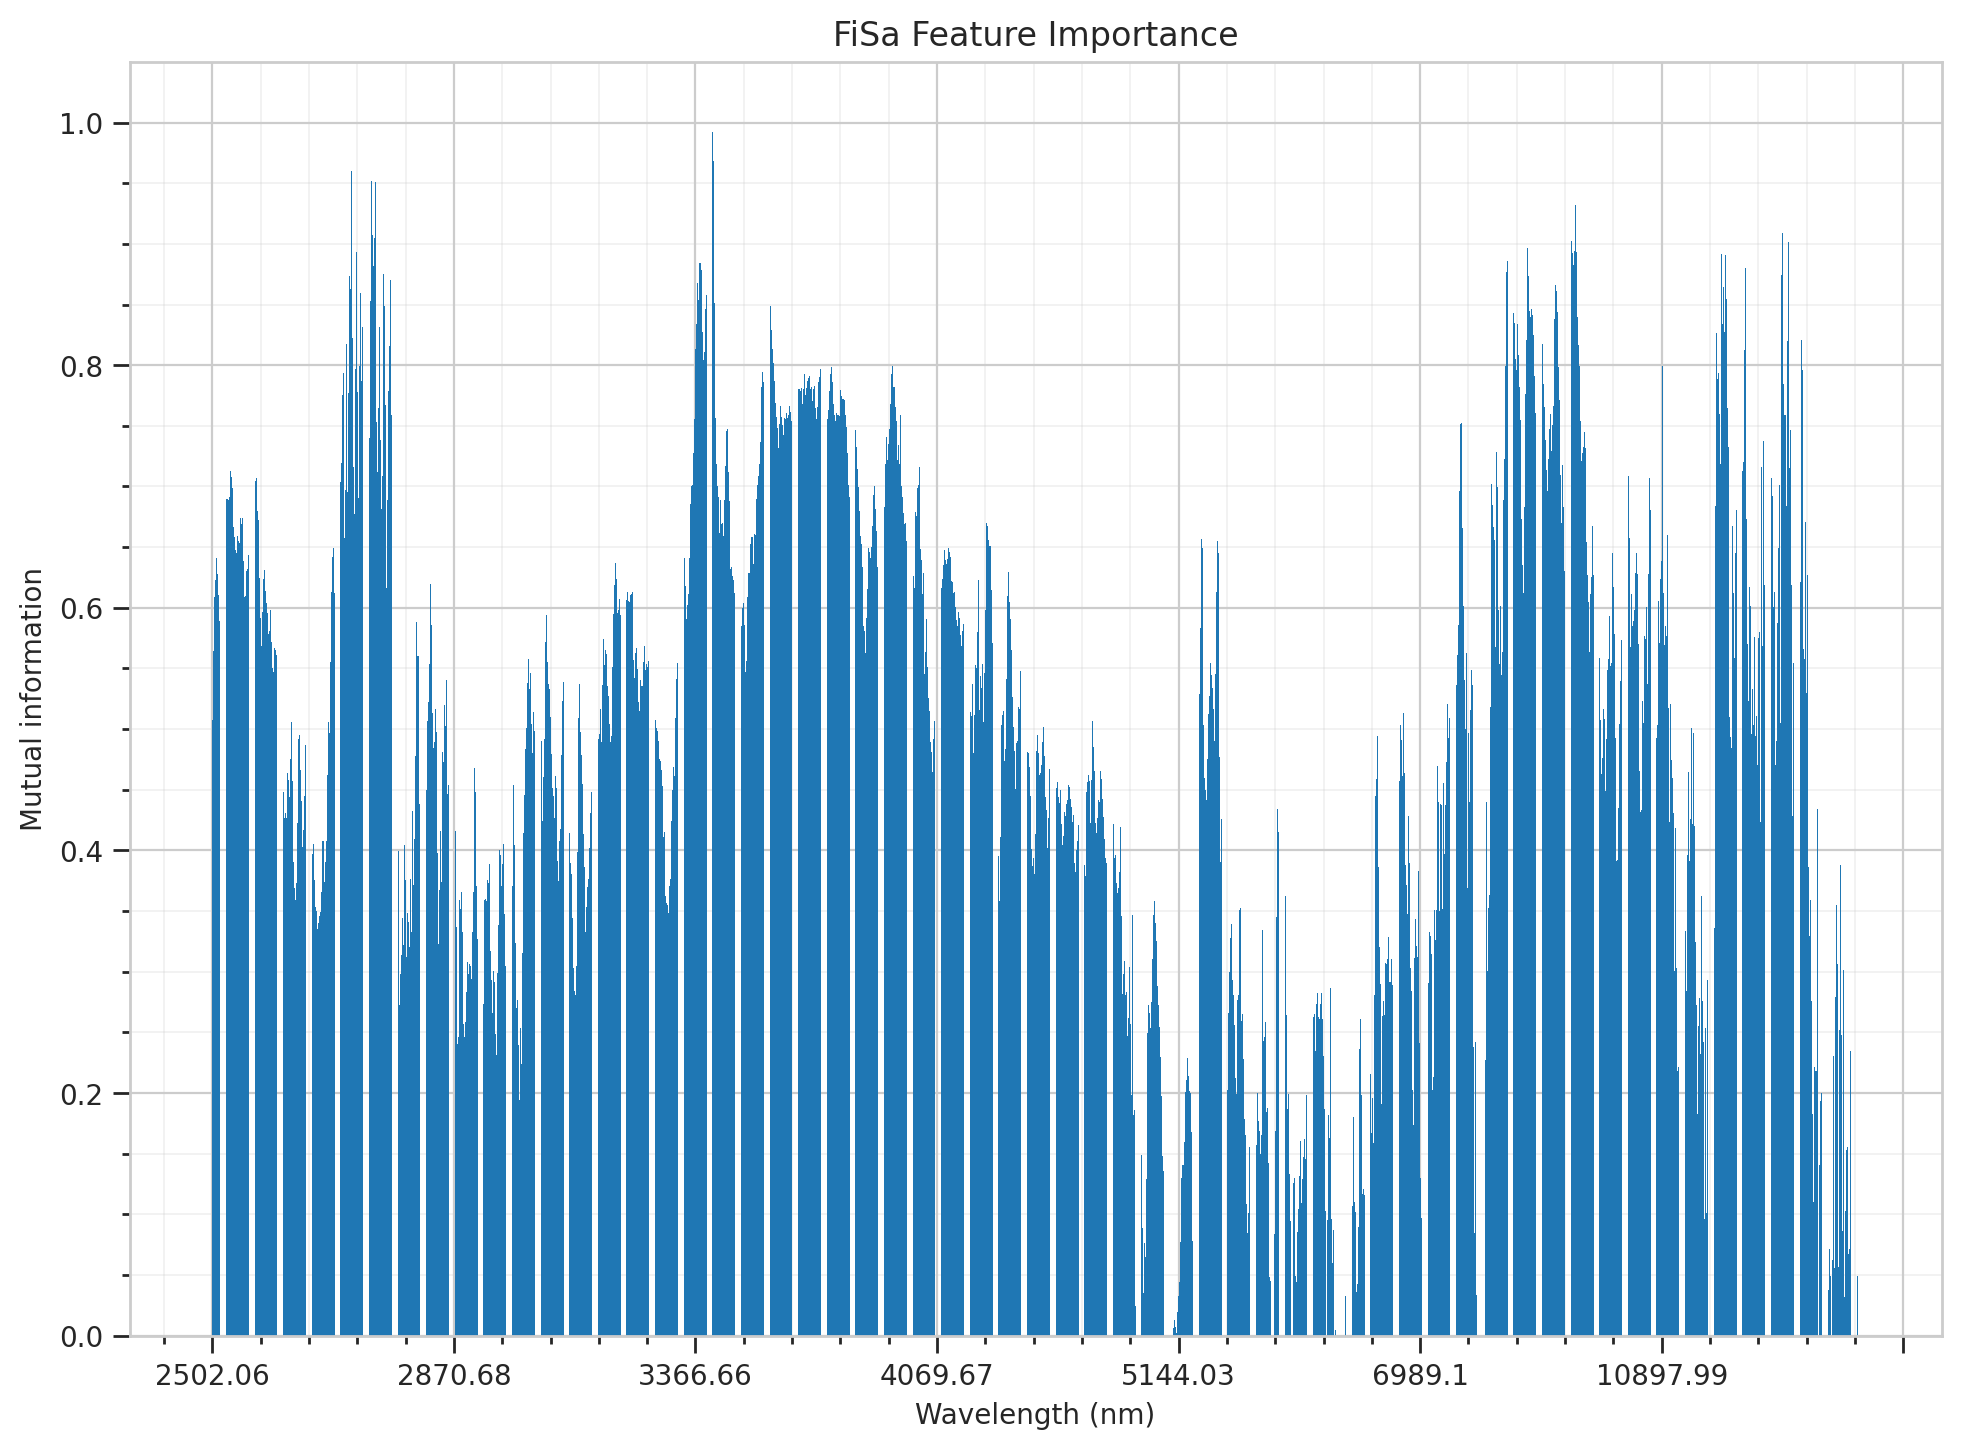

In [47]:
xai = PreHocAnalysis(dataset_fisa)
axes = xai.bar_plot_importance(method=FeatureRanking.MI)
axes[0].set_xlabel('Wavelength (nm)')
axes[0].set_title('FiSa Feature Importance')

Text(0.5, 1.0, 'MeSa Feature Importance')

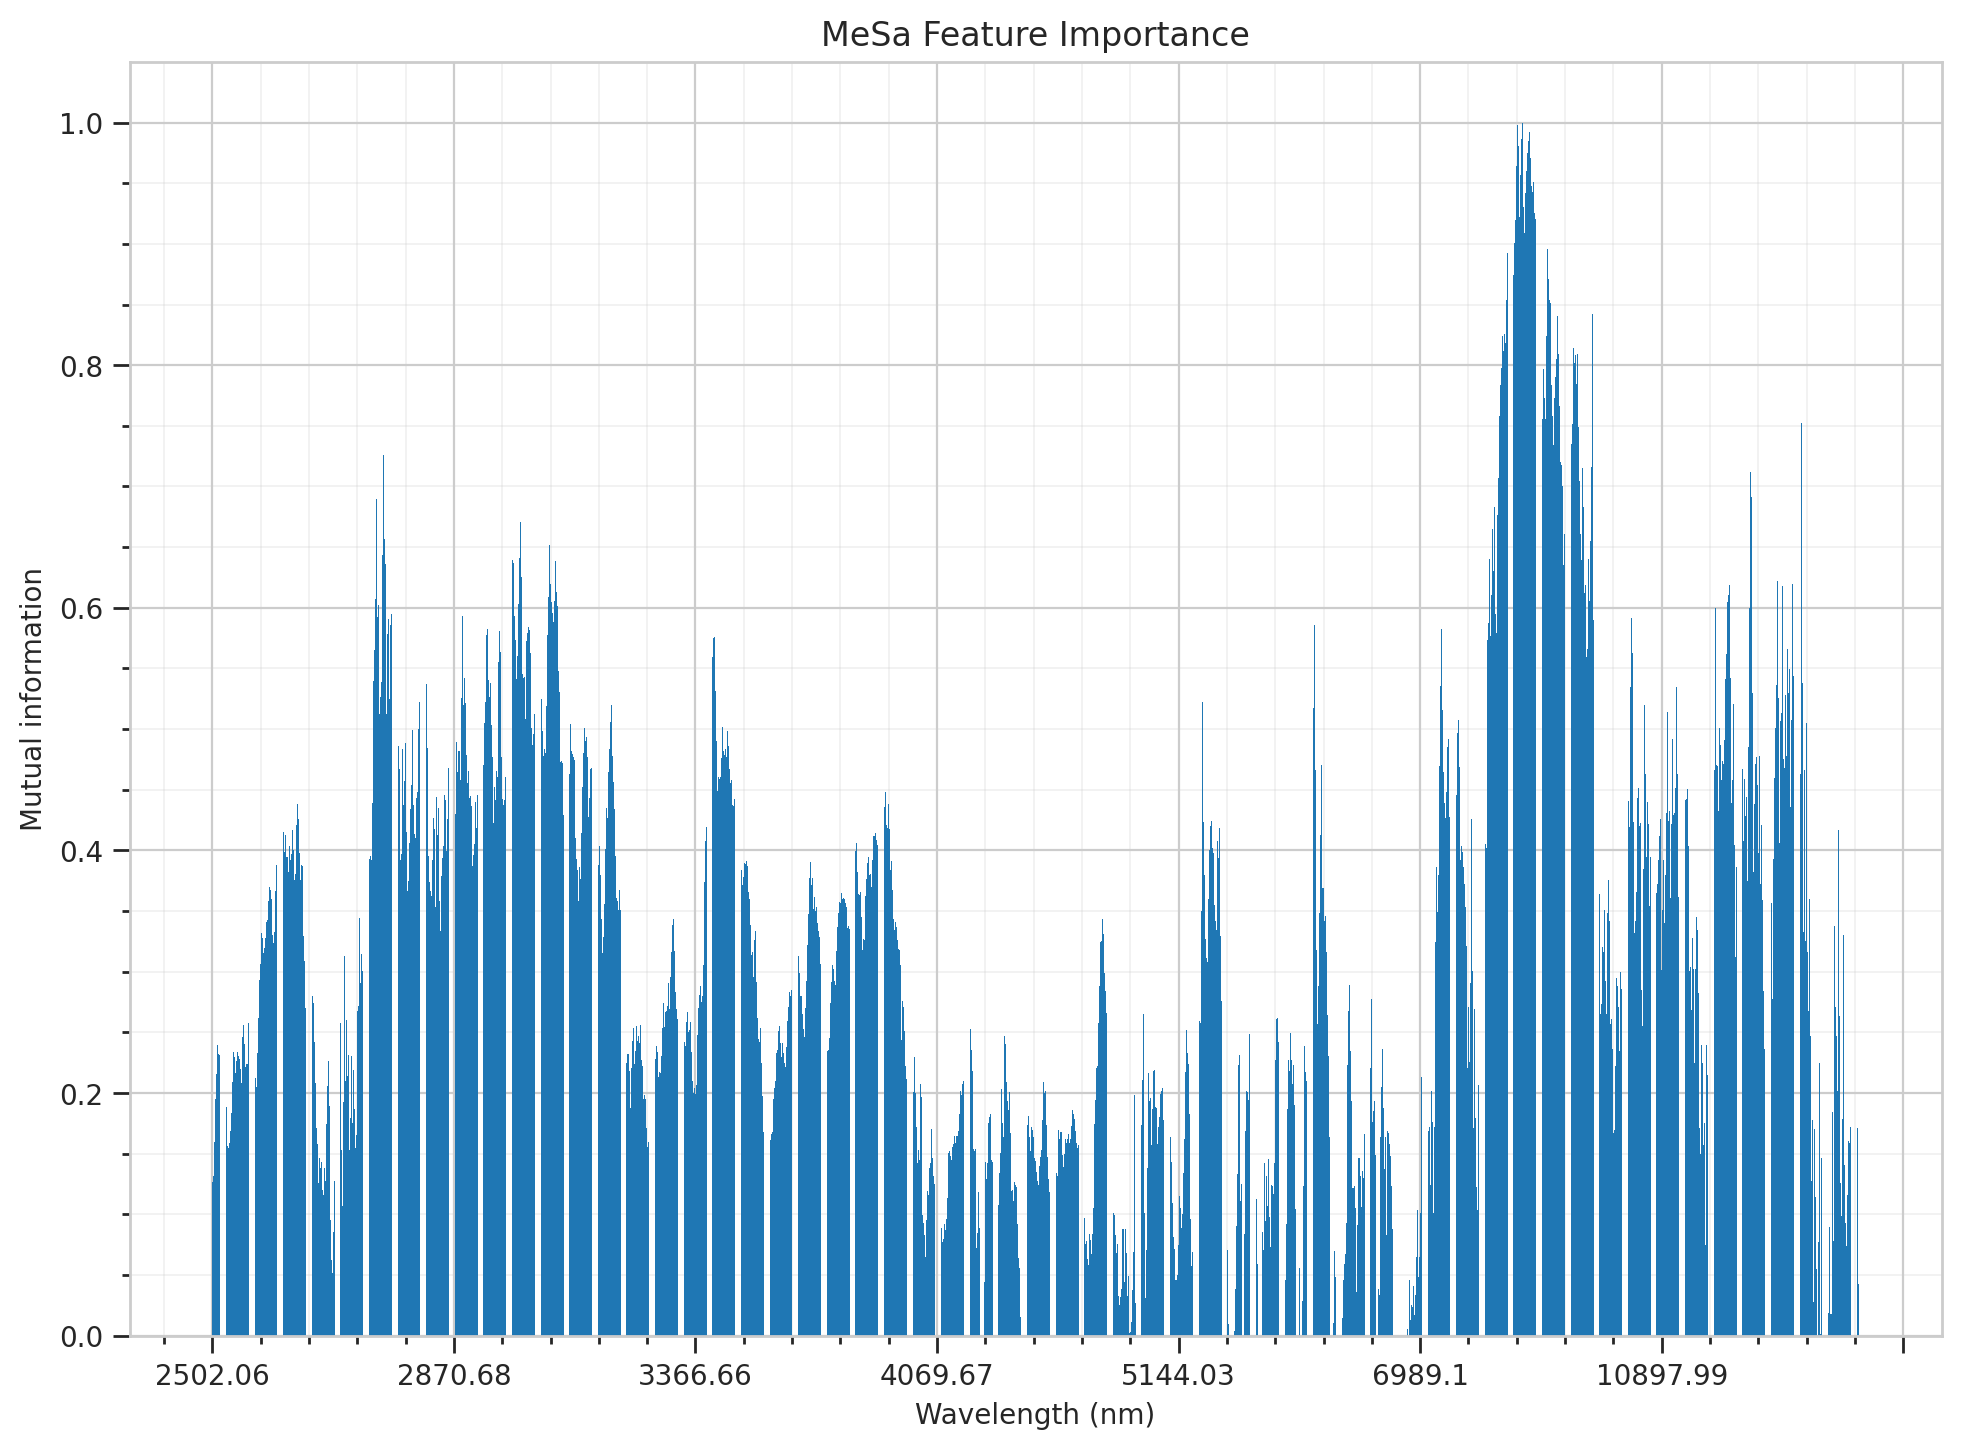

In [48]:
xai = PreHocAnalysis(dataset_mesa)
axes = xai.bar_plot_importance(method=FeatureRanking.MI)
axes[0].set_xlabel('Wavelength (nm)')
axes[0].set_title('MeSa Feature Importance')

The final step is to plot the spectrum according to quantiles of each property value.

Text(0.5, 0, 'Wavelength (nm)')

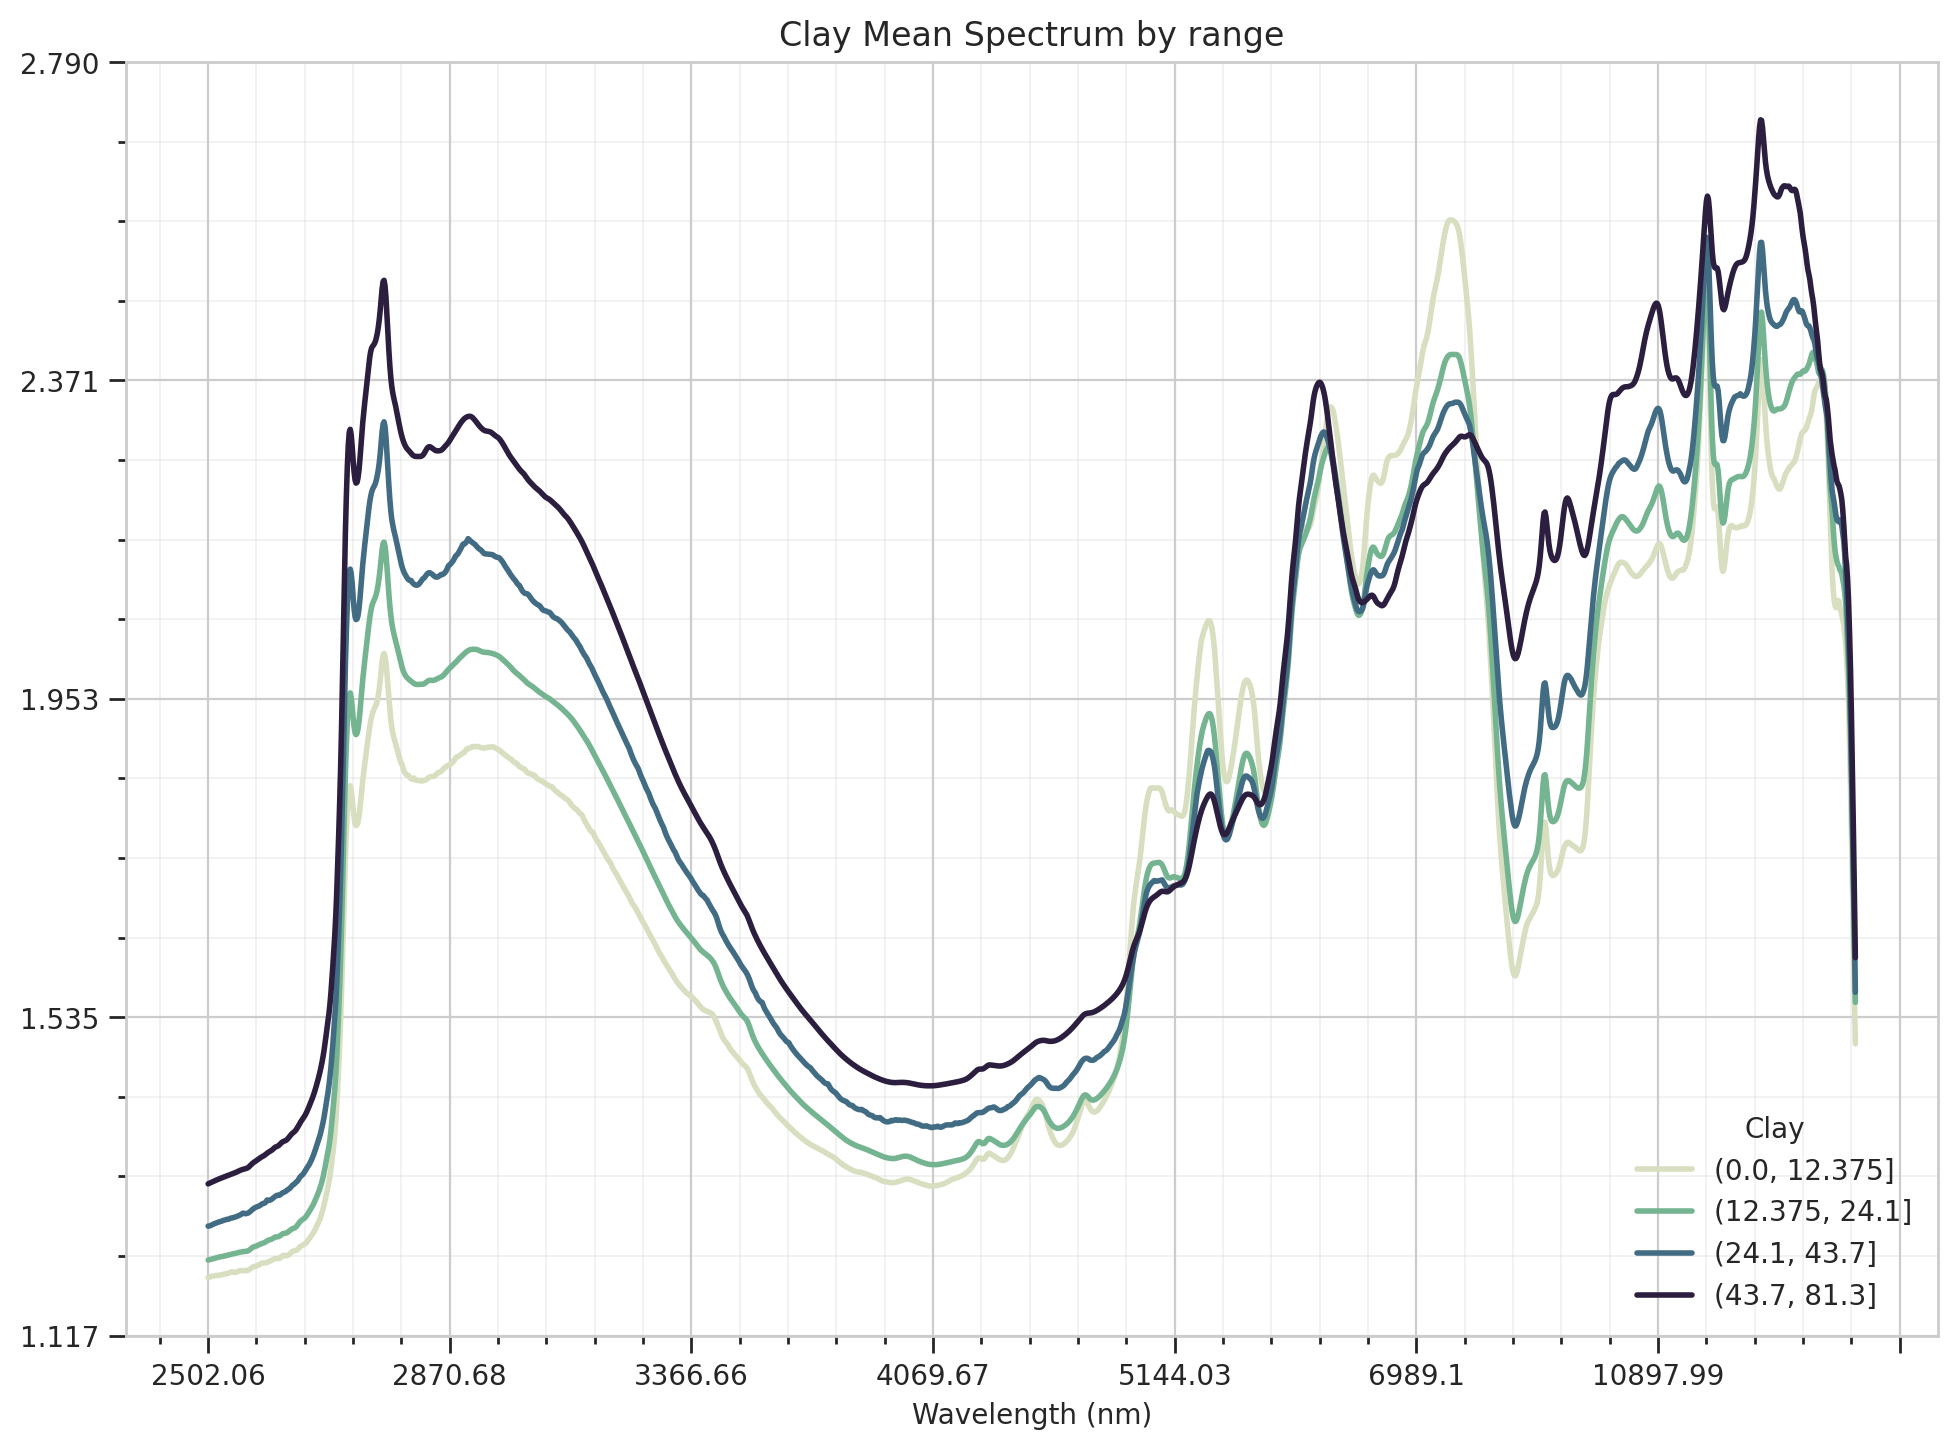

In [49]:
import numpy as np

axes = PreHocAnalysis(dataset_clay).mean_spectrum_by_range(
    y_ranges=[
        np.percentile(dataset_clay.Y.squeeze(), [0, 25, 50, 75, 100])
    ],
    preprocesses=[
        SpectralPreprocessing.NONE
    ]
)
axes[0,0].legend(title='Clay')
axes[0,0].set_title('Clay Mean Spectrum by range')
axes[0,0].set_xlabel('Wavelength (nm)')

Text(0.5, 0, 'Wavelength (nm)')

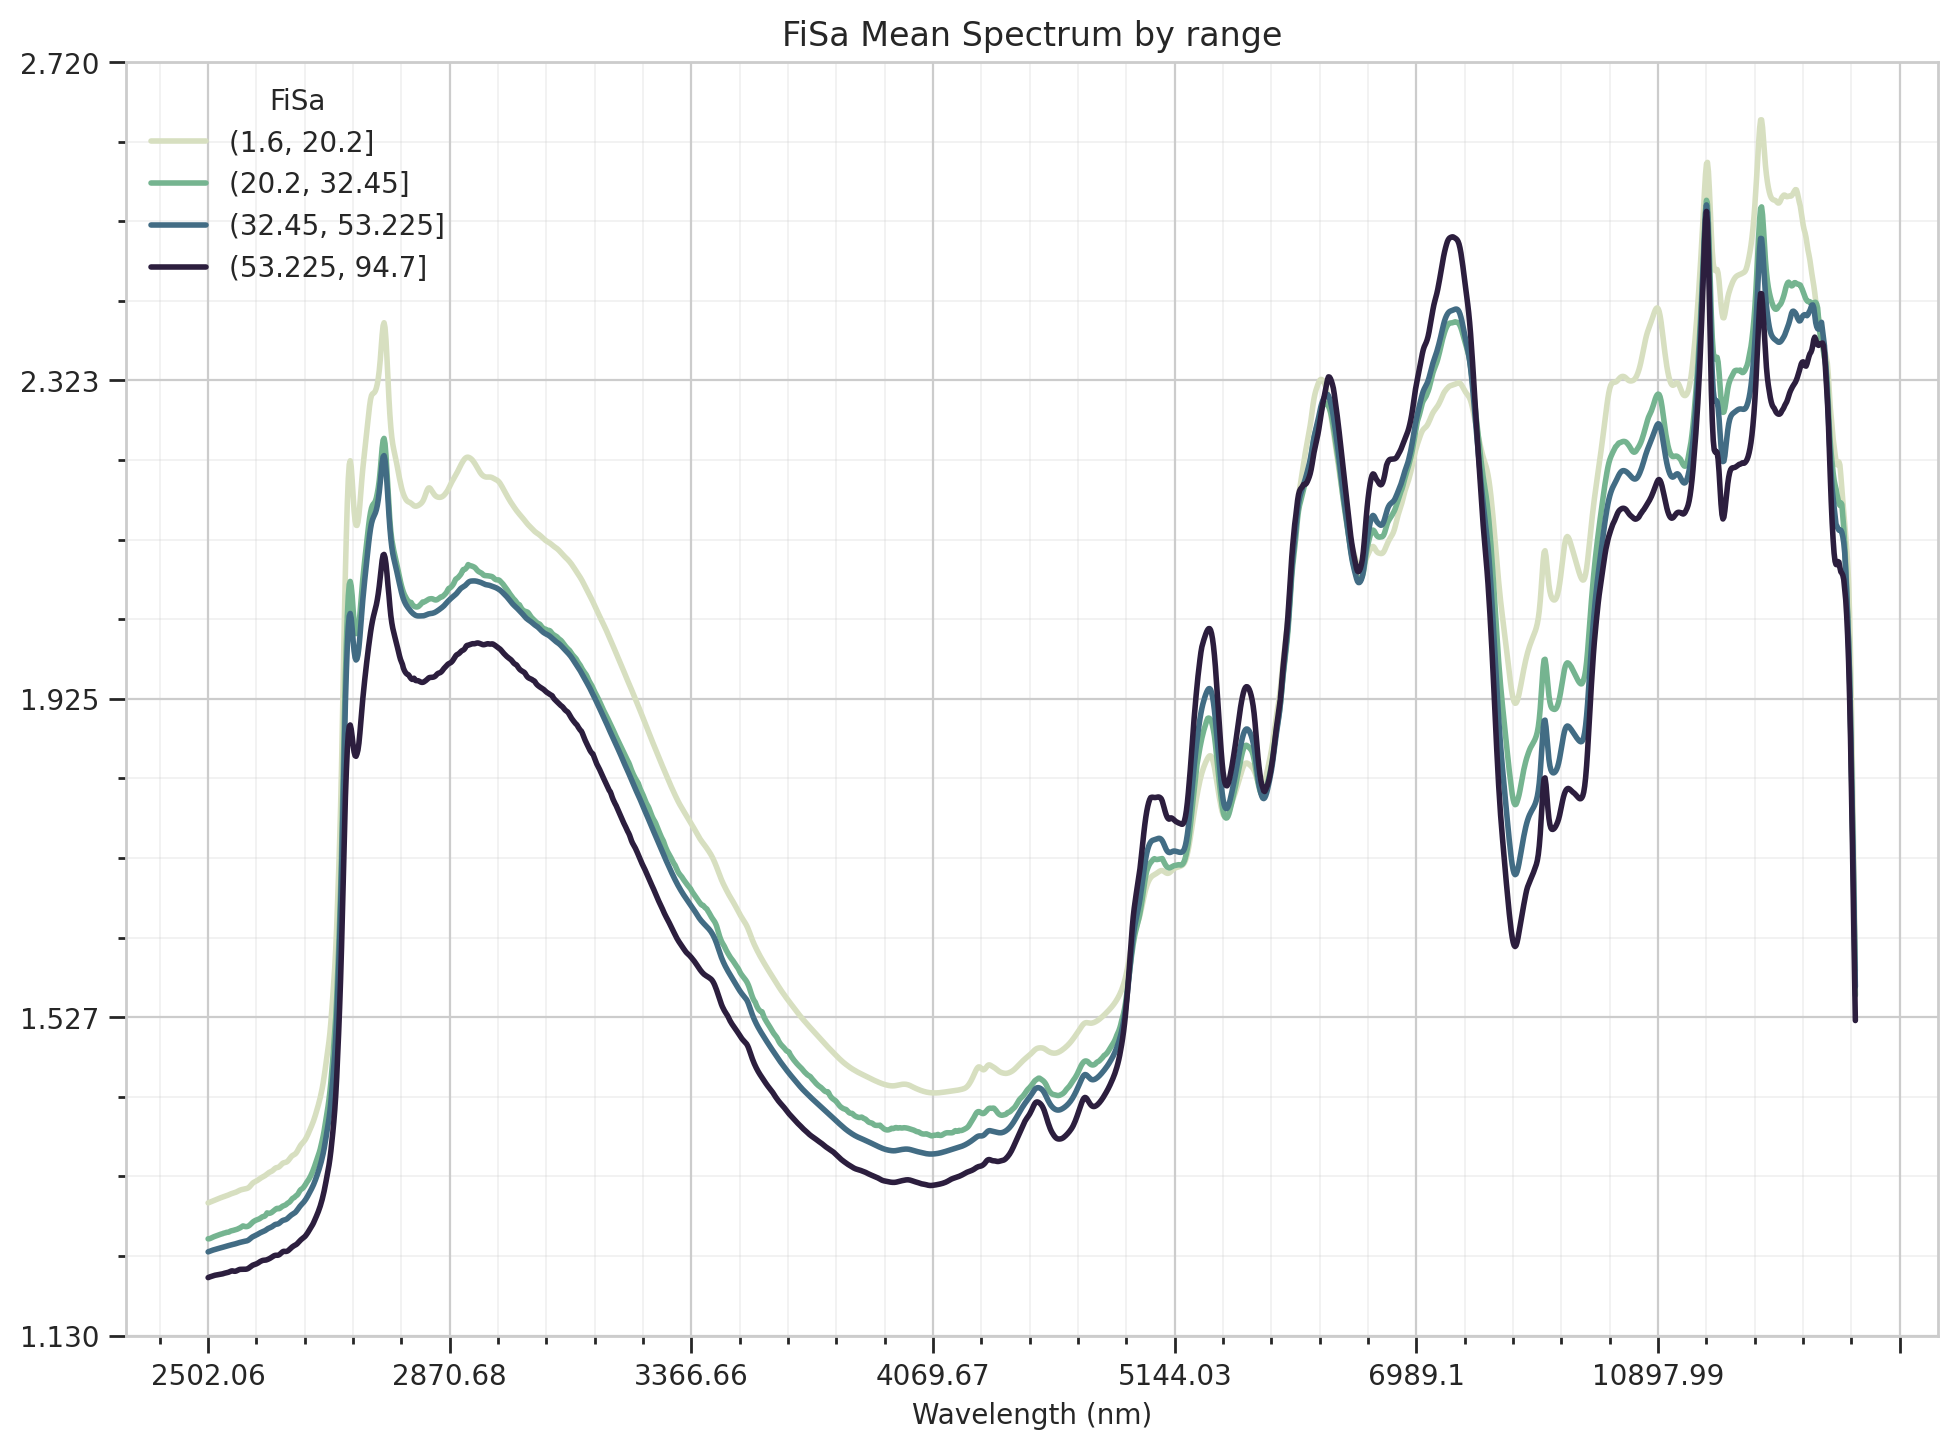

In [50]:
axes = PreHocAnalysis(dataset_fisa).mean_spectrum_by_range(
    y_ranges=[
        np.percentile(dataset_fisa.Y.squeeze(), [0, 25, 50, 75, 100])
    ],
    preprocesses=[
        SpectralPreprocessing.NONE
    ]
)
axes[0,0].legend(title='FiSa')
axes[0,0].set_title('FiSa Mean Spectrum by range')
axes[0,0].set_xlabel('Wavelength (nm)')

Text(0.5, 0, 'Wavelength (nm)')

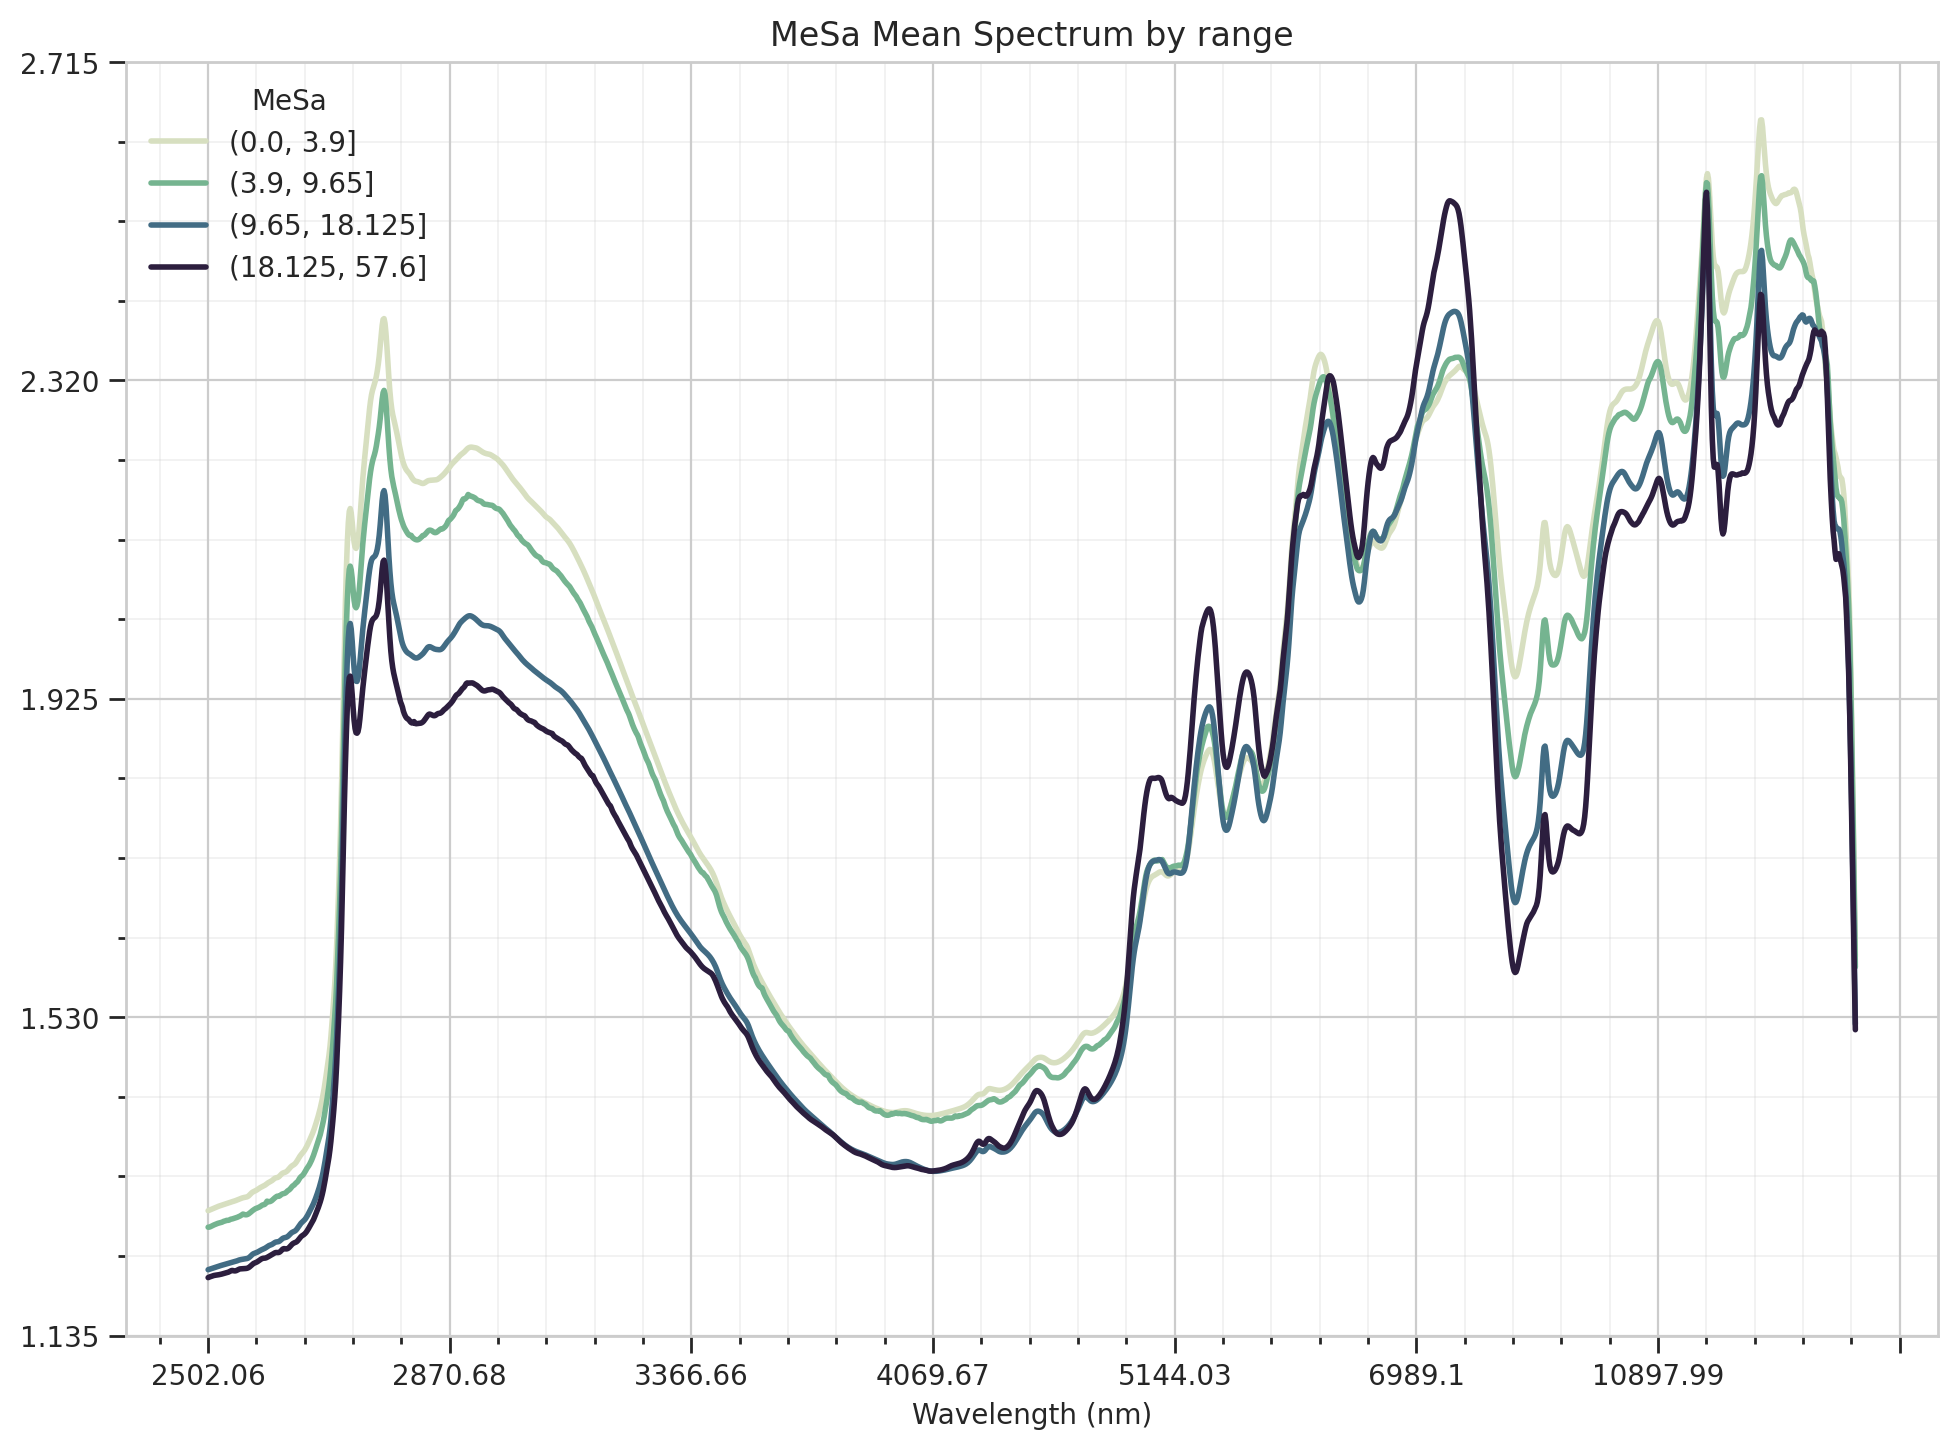

In [51]:
axes = PreHocAnalysis(dataset_mesa).mean_spectrum_by_range(
    y_ranges=[
        np.percentile(dataset_mesa.Y.squeeze(), [0, 25, 50, 75, 100])
    ],
    preprocesses=[
        SpectralPreprocessing.NONE
    ]
)
axes[0,0].legend(title='MeSa')
axes[0,0].set_title('MeSa Mean Spectrum by range')
axes[0,0].set_xlabel('Wavelength (nm)')

* Post Hoc Analysis:

In this part previously trained models will be used to demonstrate the feature importance post modelling.

### Random Forest

For Clay:

Text(0.5, 0, 'Wavelength (nm)')

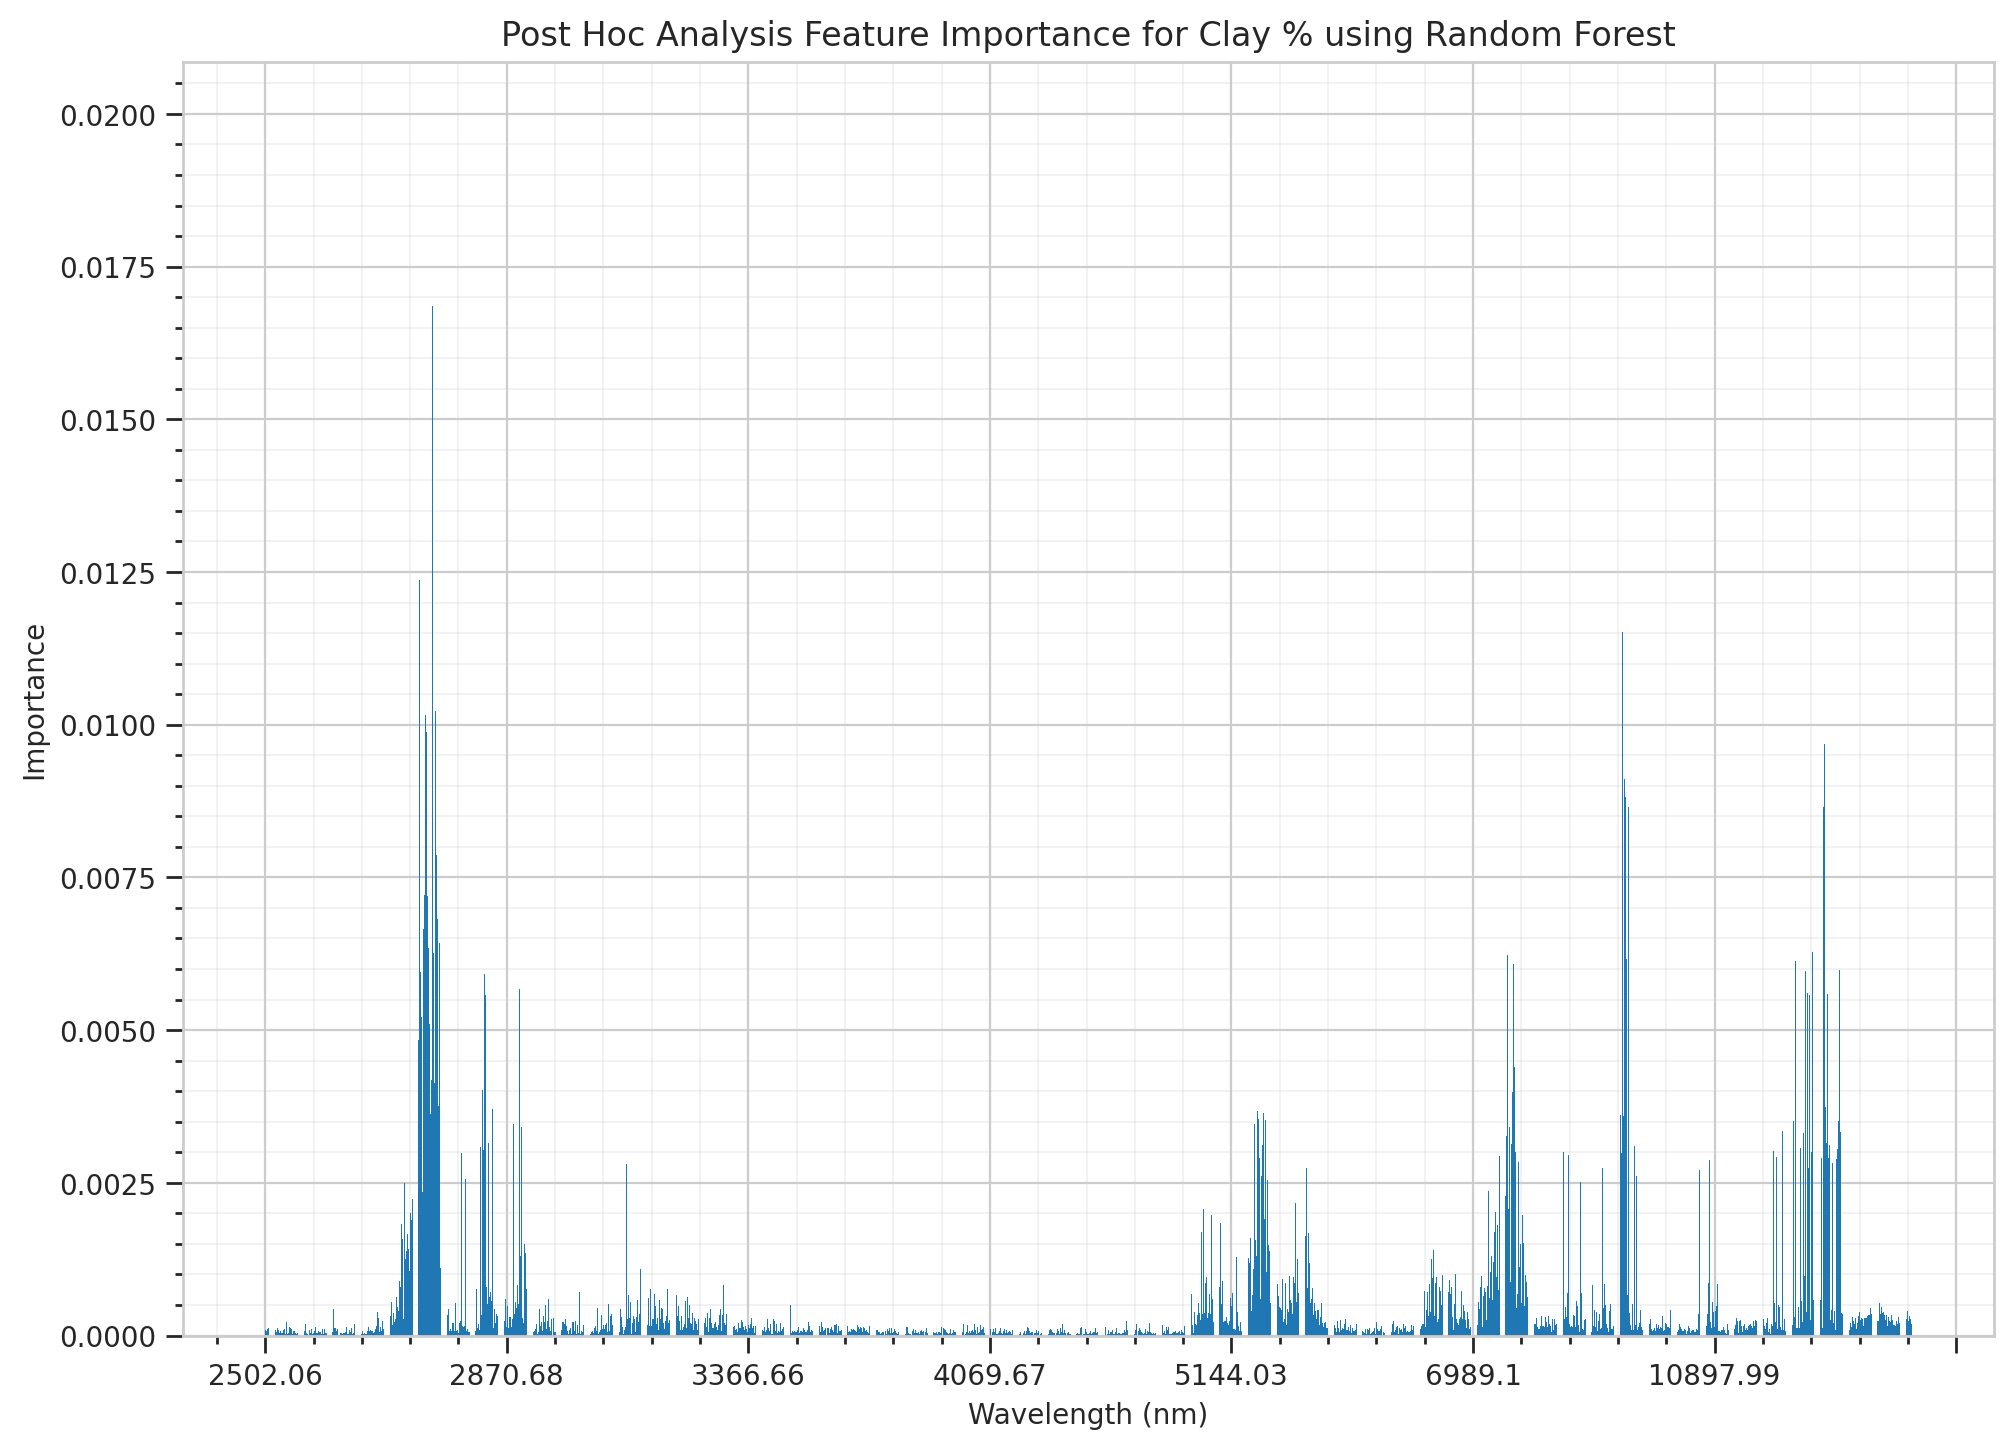

In [52]:
from spectraxai.explain import PostHocAnalysis

rf = StandardModel(Model.RF)
clay_res_rf = rf.fit_and_predict(dataset_clay,  idx_trn=idx_trn_clay, get_model=True)
xai = PostHocAnalysis(dataset_clay)
ax = xai.bar_plot_importance(clay_res_rf.iloc[0]["feature_importance"])
ax.set_title('Post Hoc Analysis Feature Importance for Clay % using Random Forest')
ax.set_xlabel('Wavelength (nm)')

For FiSa:

Text(0.5, 0, 'Wavelength (nm)')

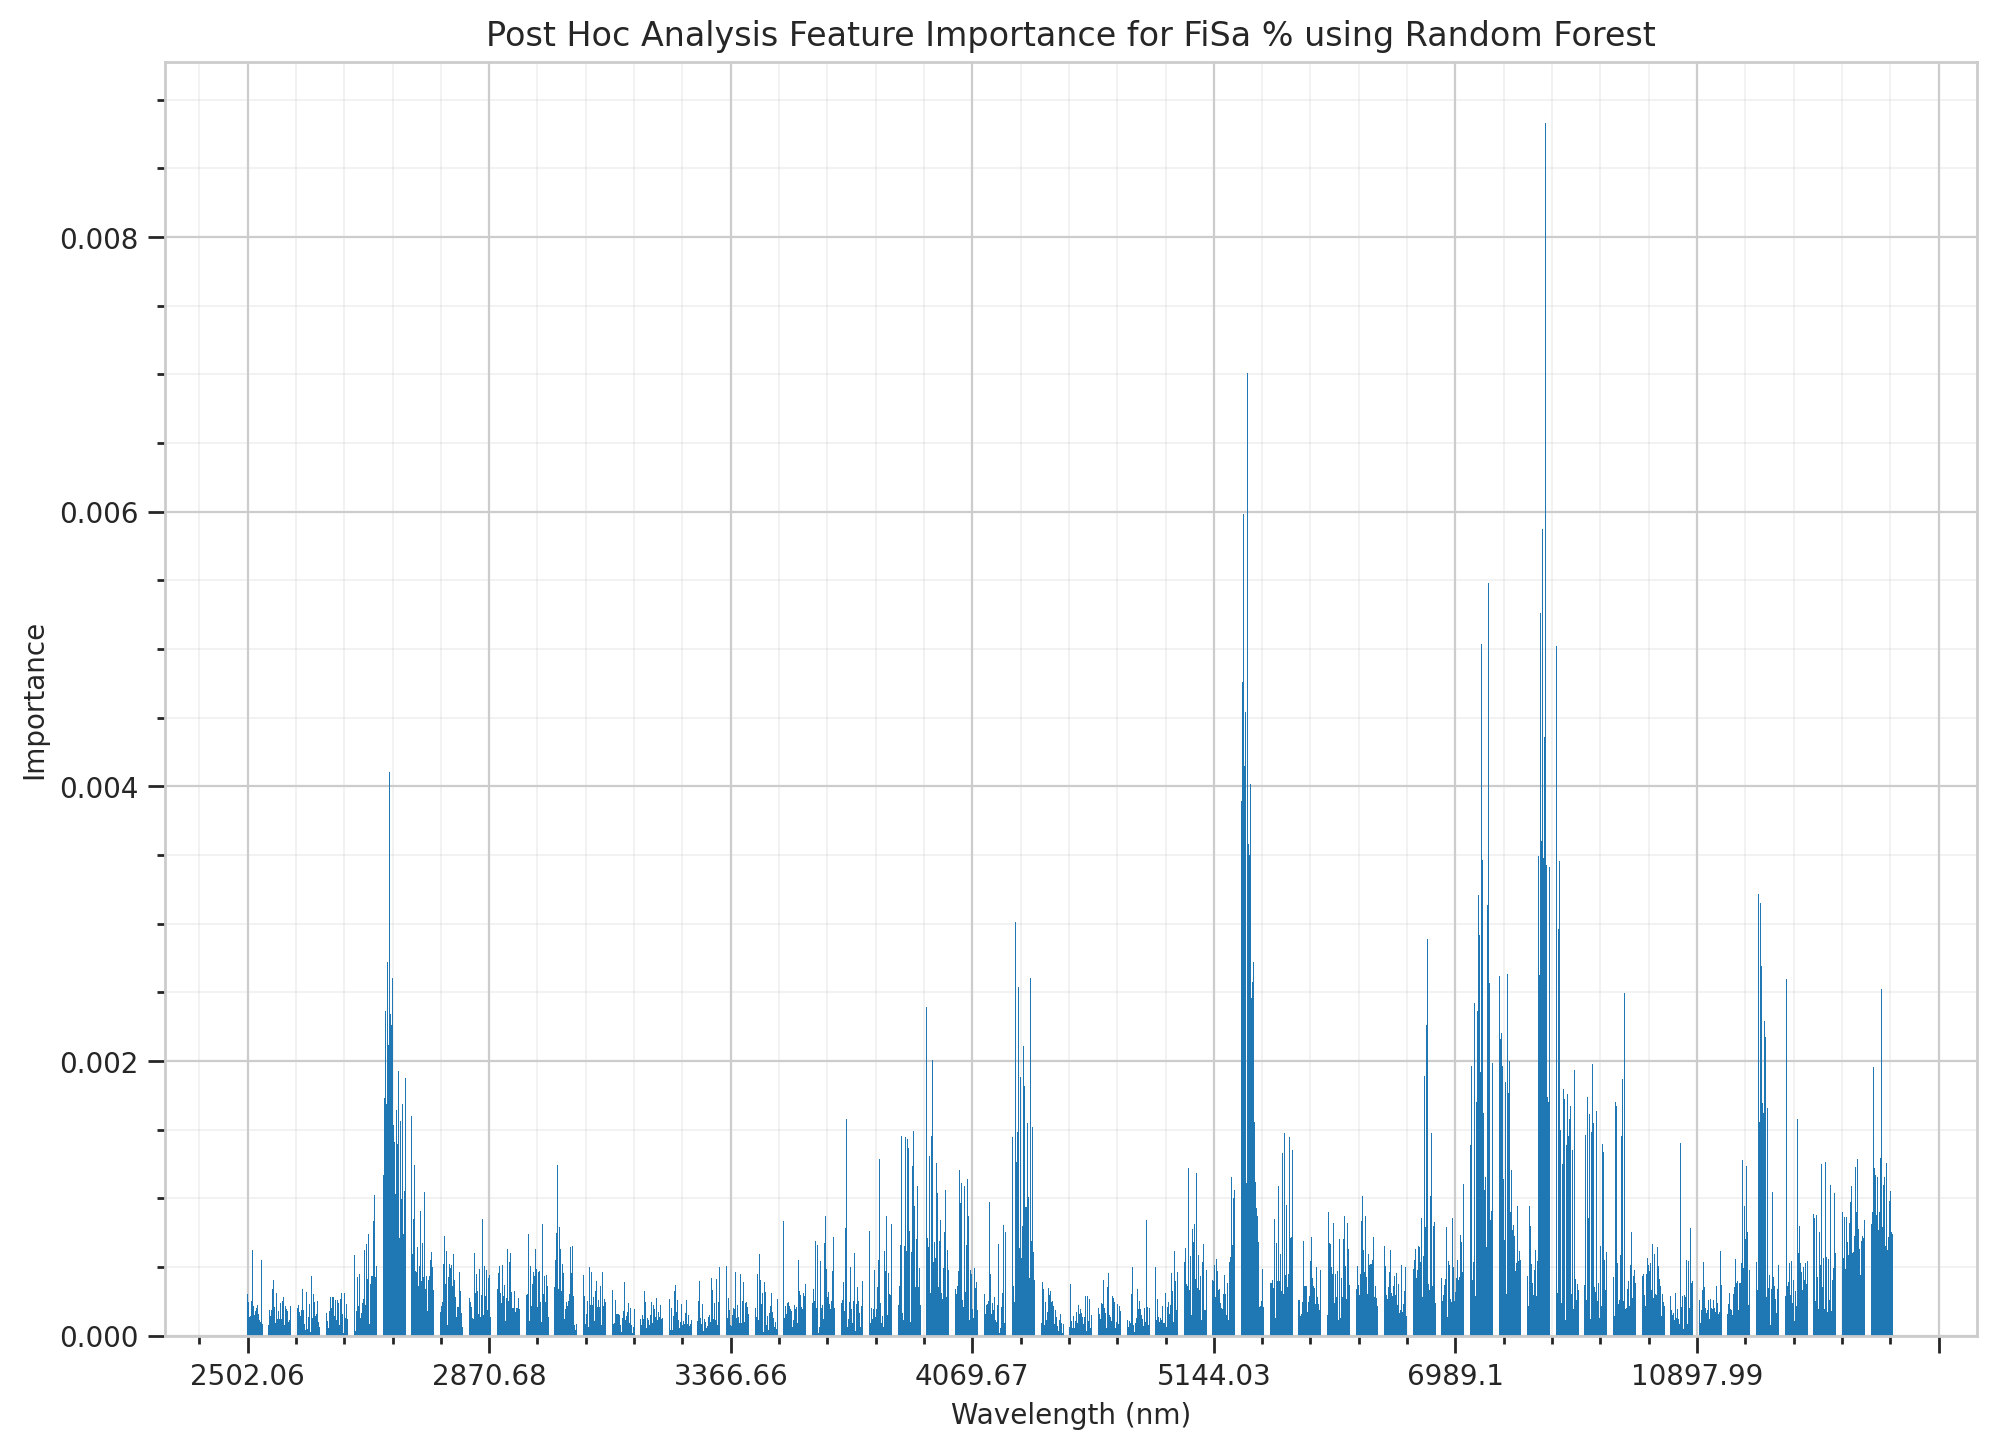

In [53]:
fisa_res_rf = rf.fit_and_predict(dataset_fisa,  idx_trn=idx_trn_fisa, get_model=True)
xai = PostHocAnalysis(dataset_fisa)
ax = xai.bar_plot_importance(fisa_res_rf.iloc[0]["feature_importance"])
ax.set_title('Post Hoc Analysis Feature Importance for FiSa % using Random Forest')
ax.set_xlabel('Wavelength (nm)')

For MeSa:

Text(0.5, 0, 'Wavelength (nm)')

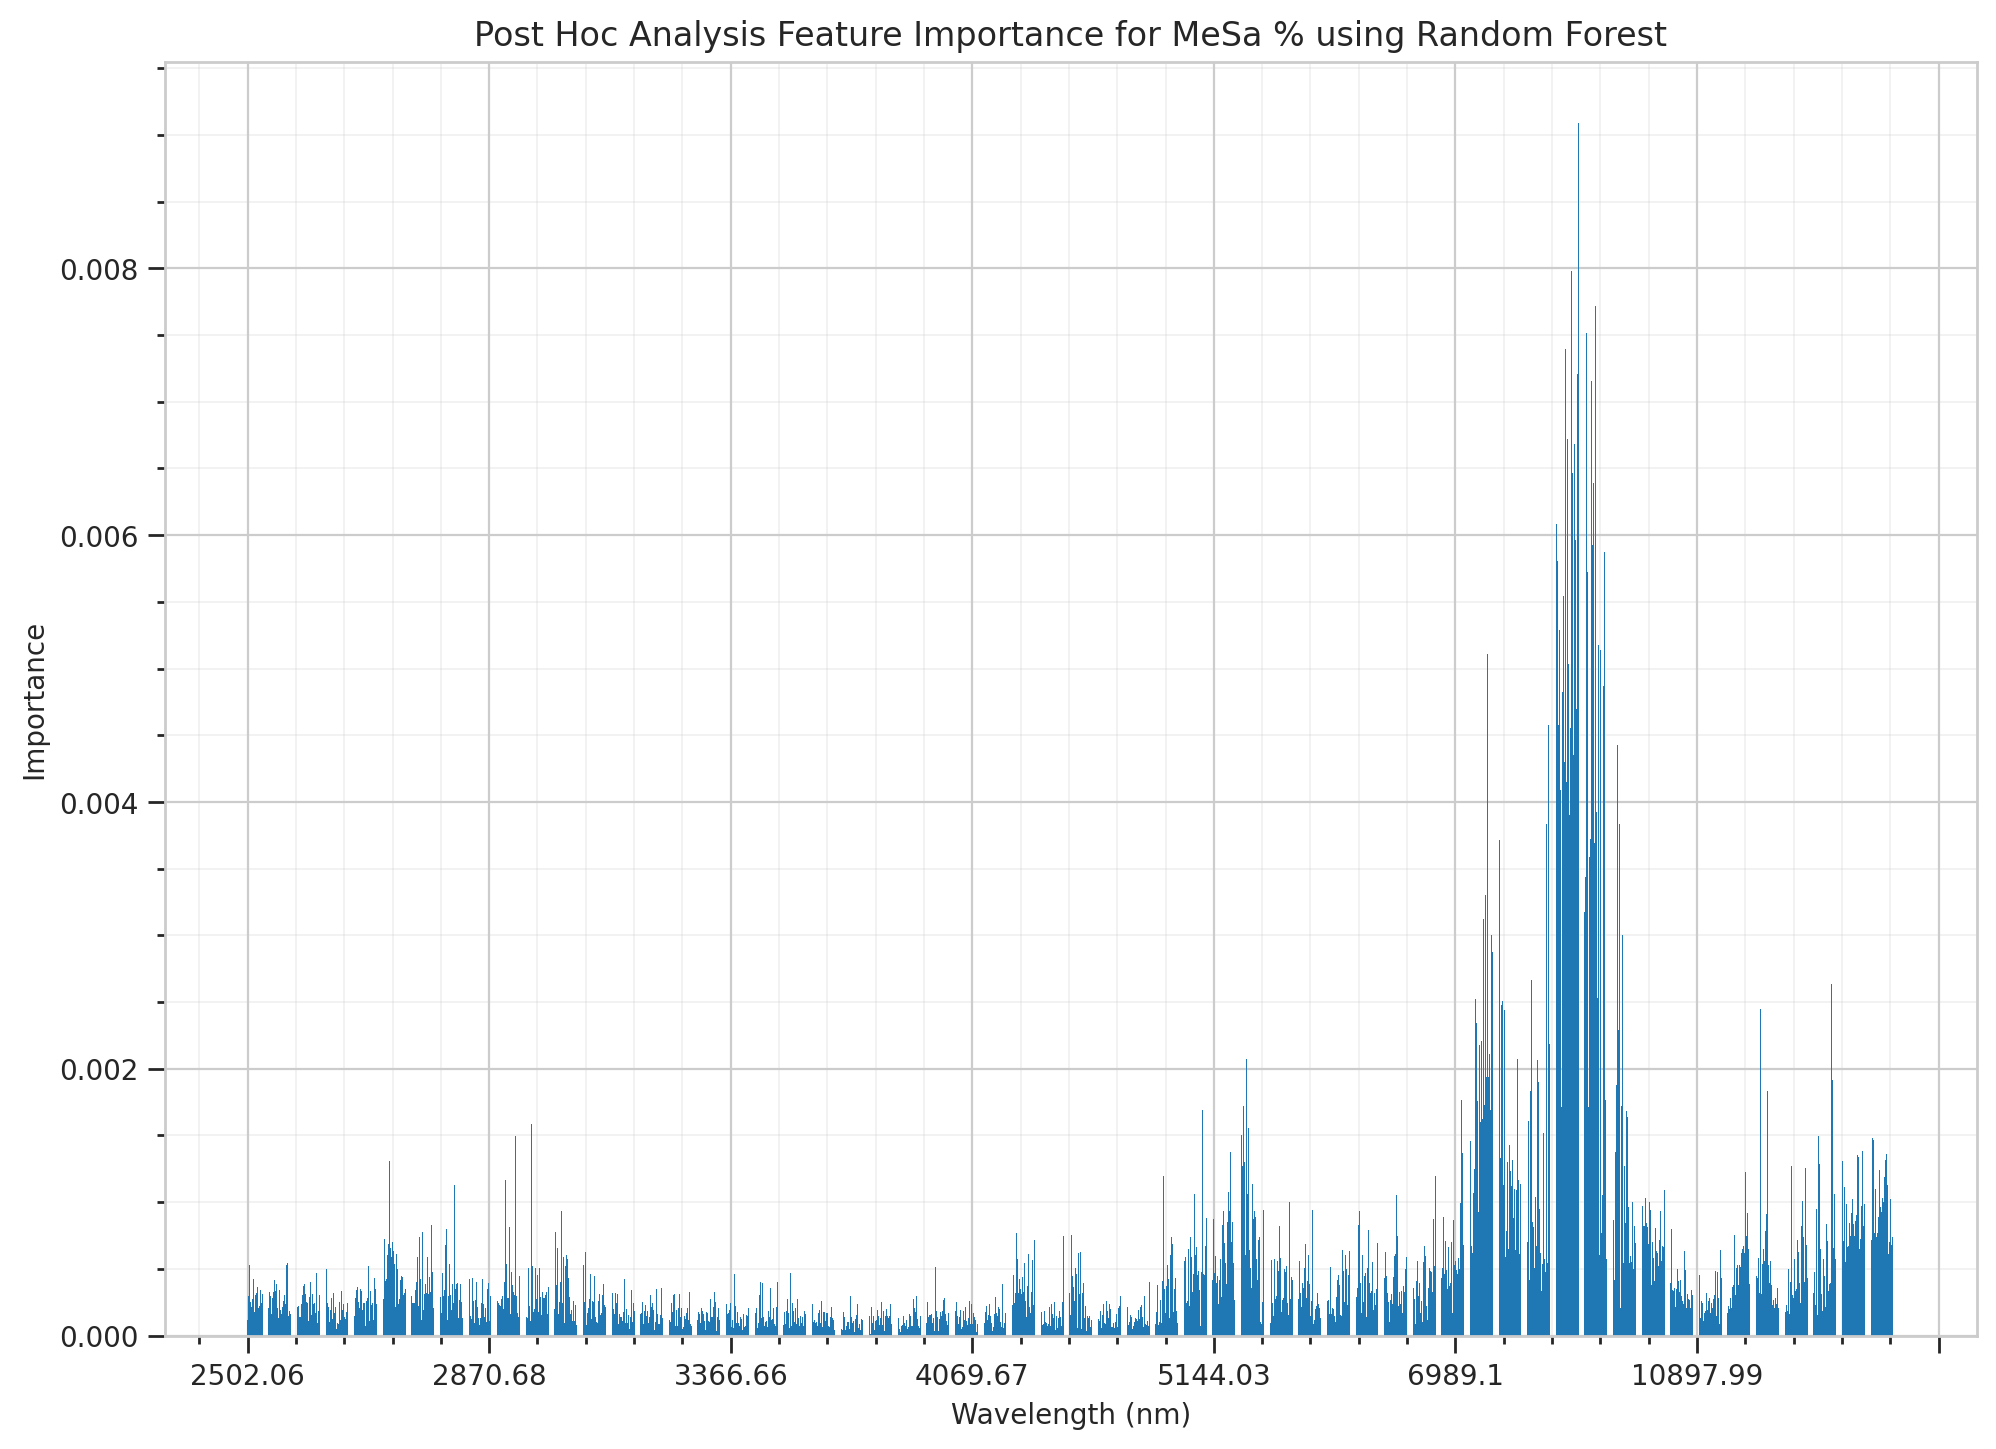

In [54]:
mesa_res_rf = rf.fit_and_predict(dataset_mesa,  idx_trn=idx_trn_mesa, get_model=True)
xai = PostHocAnalysis(dataset_mesa)
ax = xai.bar_plot_importance(mesa_res_rf.iloc[0]["feature_importance"])
ax.set_title('Post Hoc Analysis Feature Importance for MeSa % using Random Forest')
ax.set_xlabel('Wavelength (nm)')

### Partial Least Squares

For Clay:

Text(0.5, 0, 'Wavelength (nm)')

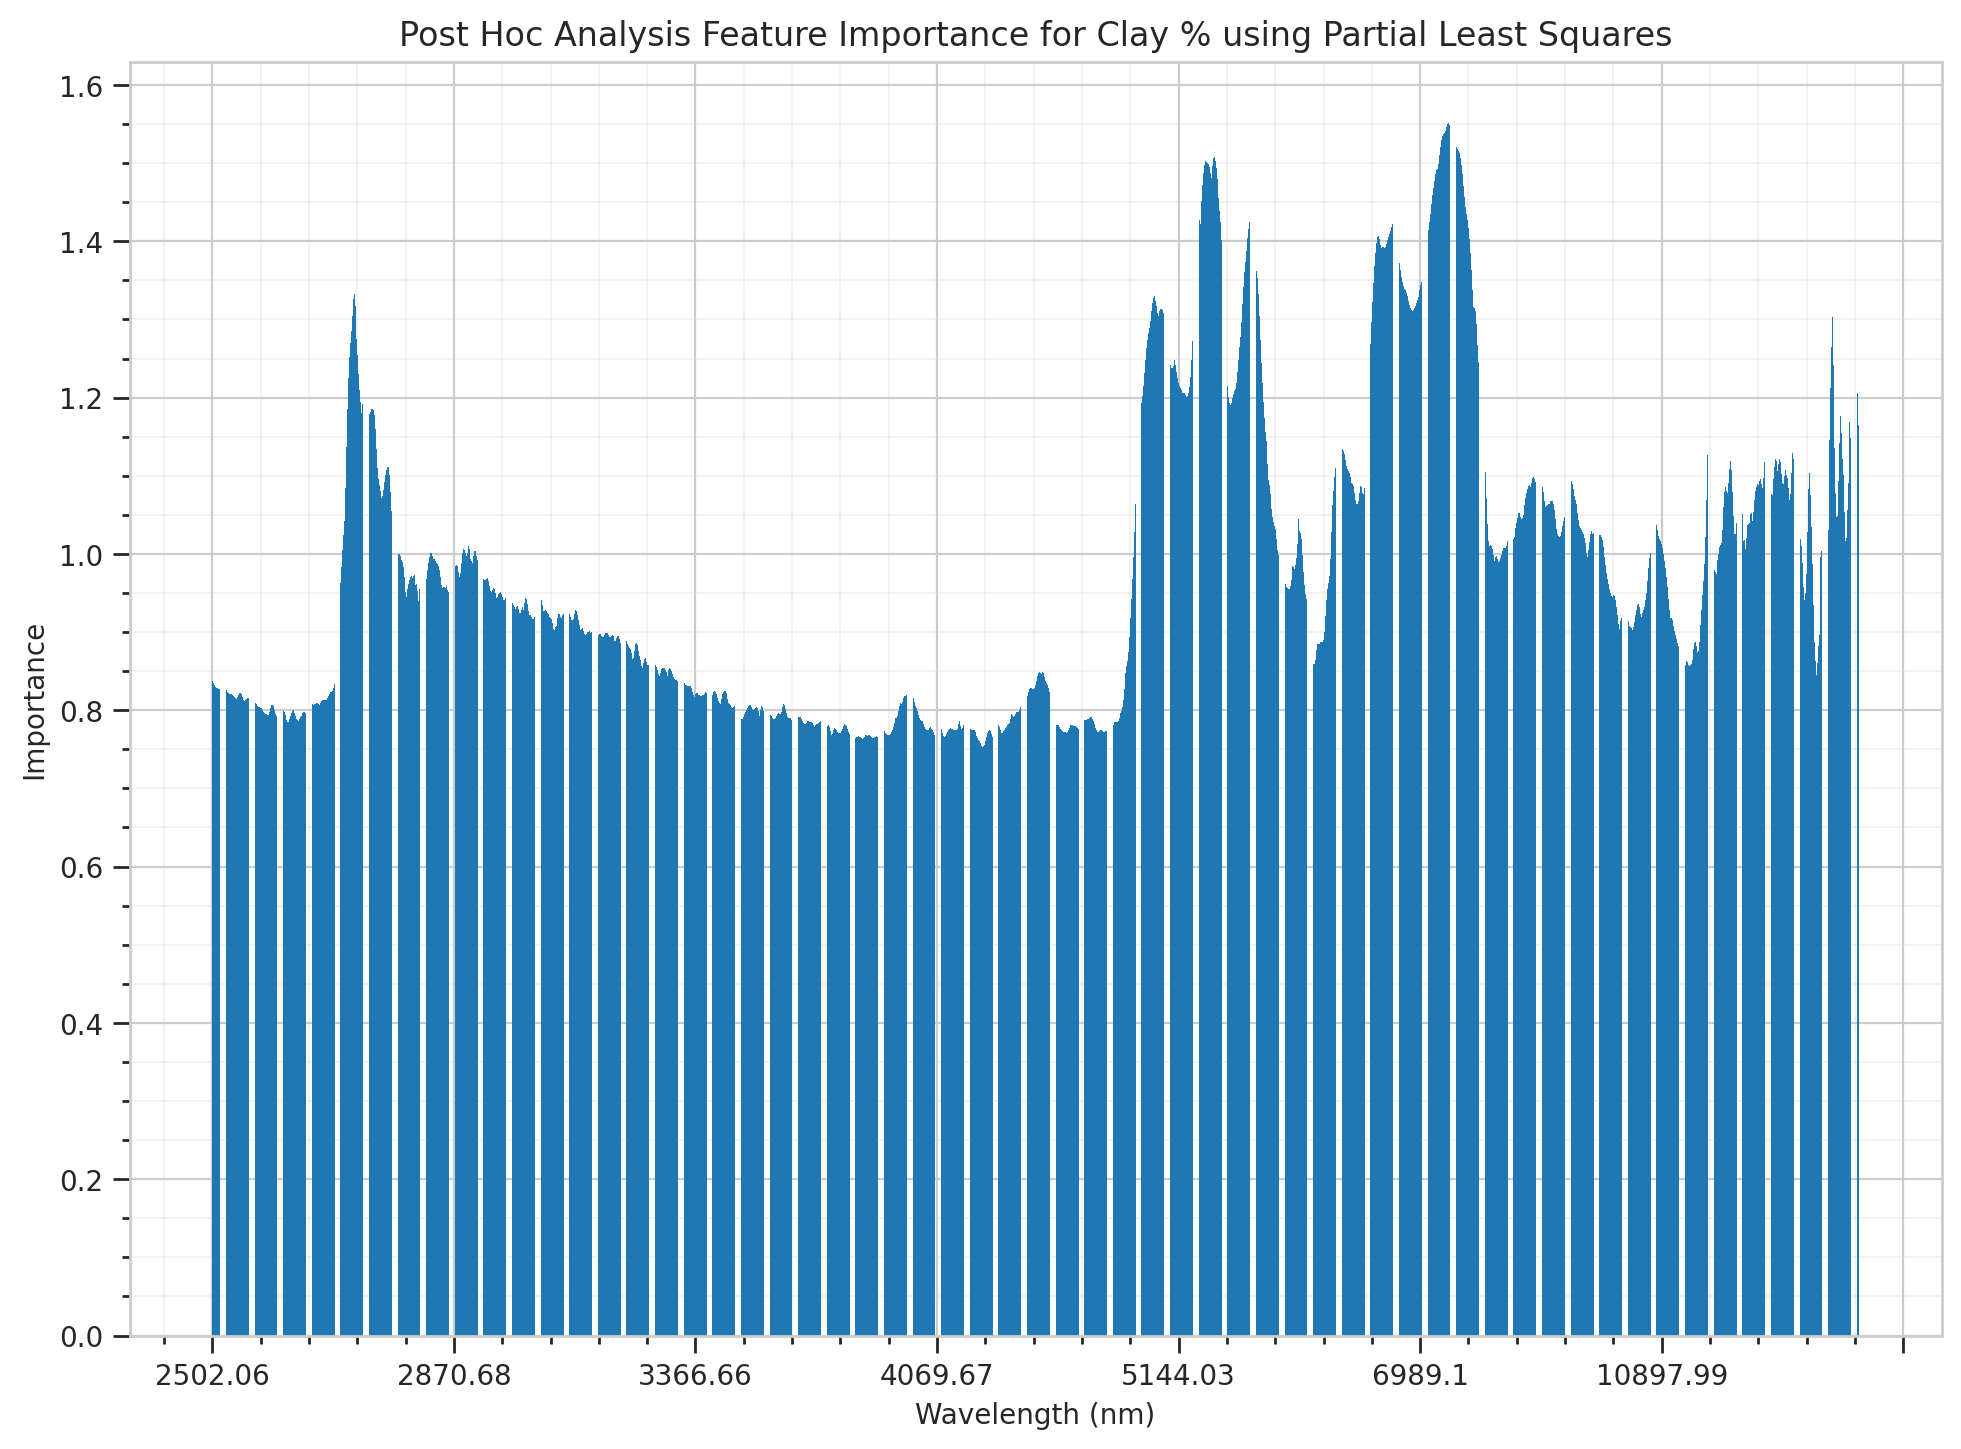

In [55]:
pls = StandardModel(Model.PLS)
clay_res_pls = pls.fit_and_predict(dataset_clay,  idx_trn=idx_trn_clay, get_model=True)
xai = PostHocAnalysis(dataset_clay)
ax = xai.bar_plot_importance(clay_res_pls.iloc[0]["feature_importance"])
ax.set_title('Post Hoc Analysis Feature Importance for Clay % using Partial Least Squares')
ax.set_xlabel('Wavelength (nm)')

For FiSa:

Text(0.5, 0, 'Wavelength (nm)')

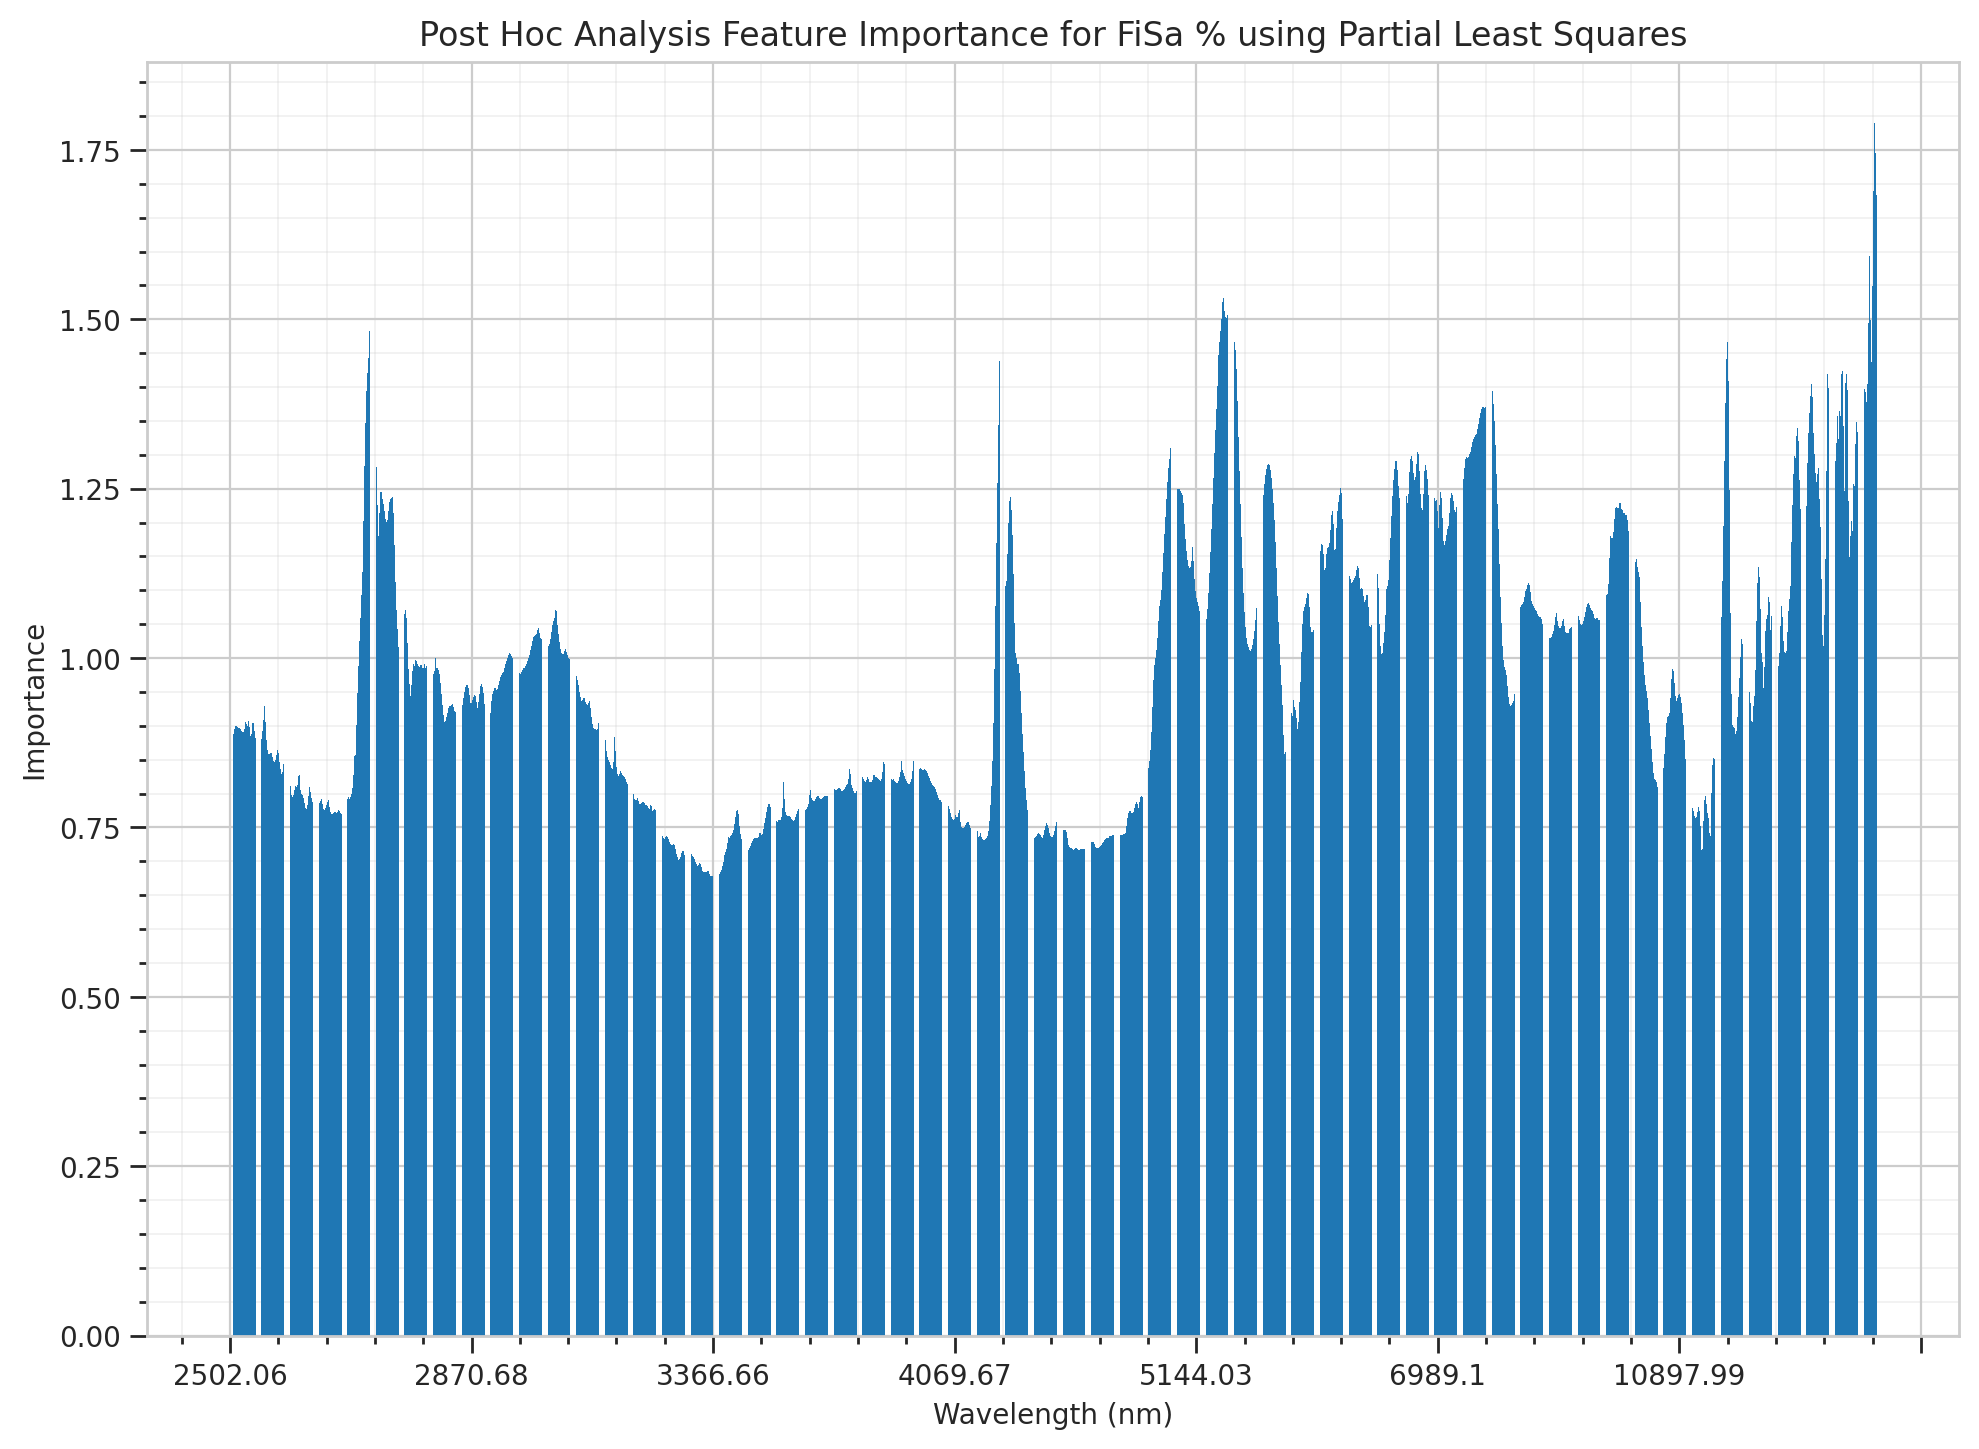

In [56]:
fisa_res_pls = pls.fit_and_predict(dataset_fisa,  idx_trn=idx_trn_fisa, get_model=True)
xai = PostHocAnalysis(dataset_fisa)
ax = xai.bar_plot_importance(fisa_res_pls.iloc[0]["feature_importance"])
ax.set_title('Post Hoc Analysis Feature Importance for FiSa % using Partial Least Squares')
ax.set_xlabel('Wavelength (nm)')

For MeSa:

Text(0.5, 0, 'Wavelength (nm)')

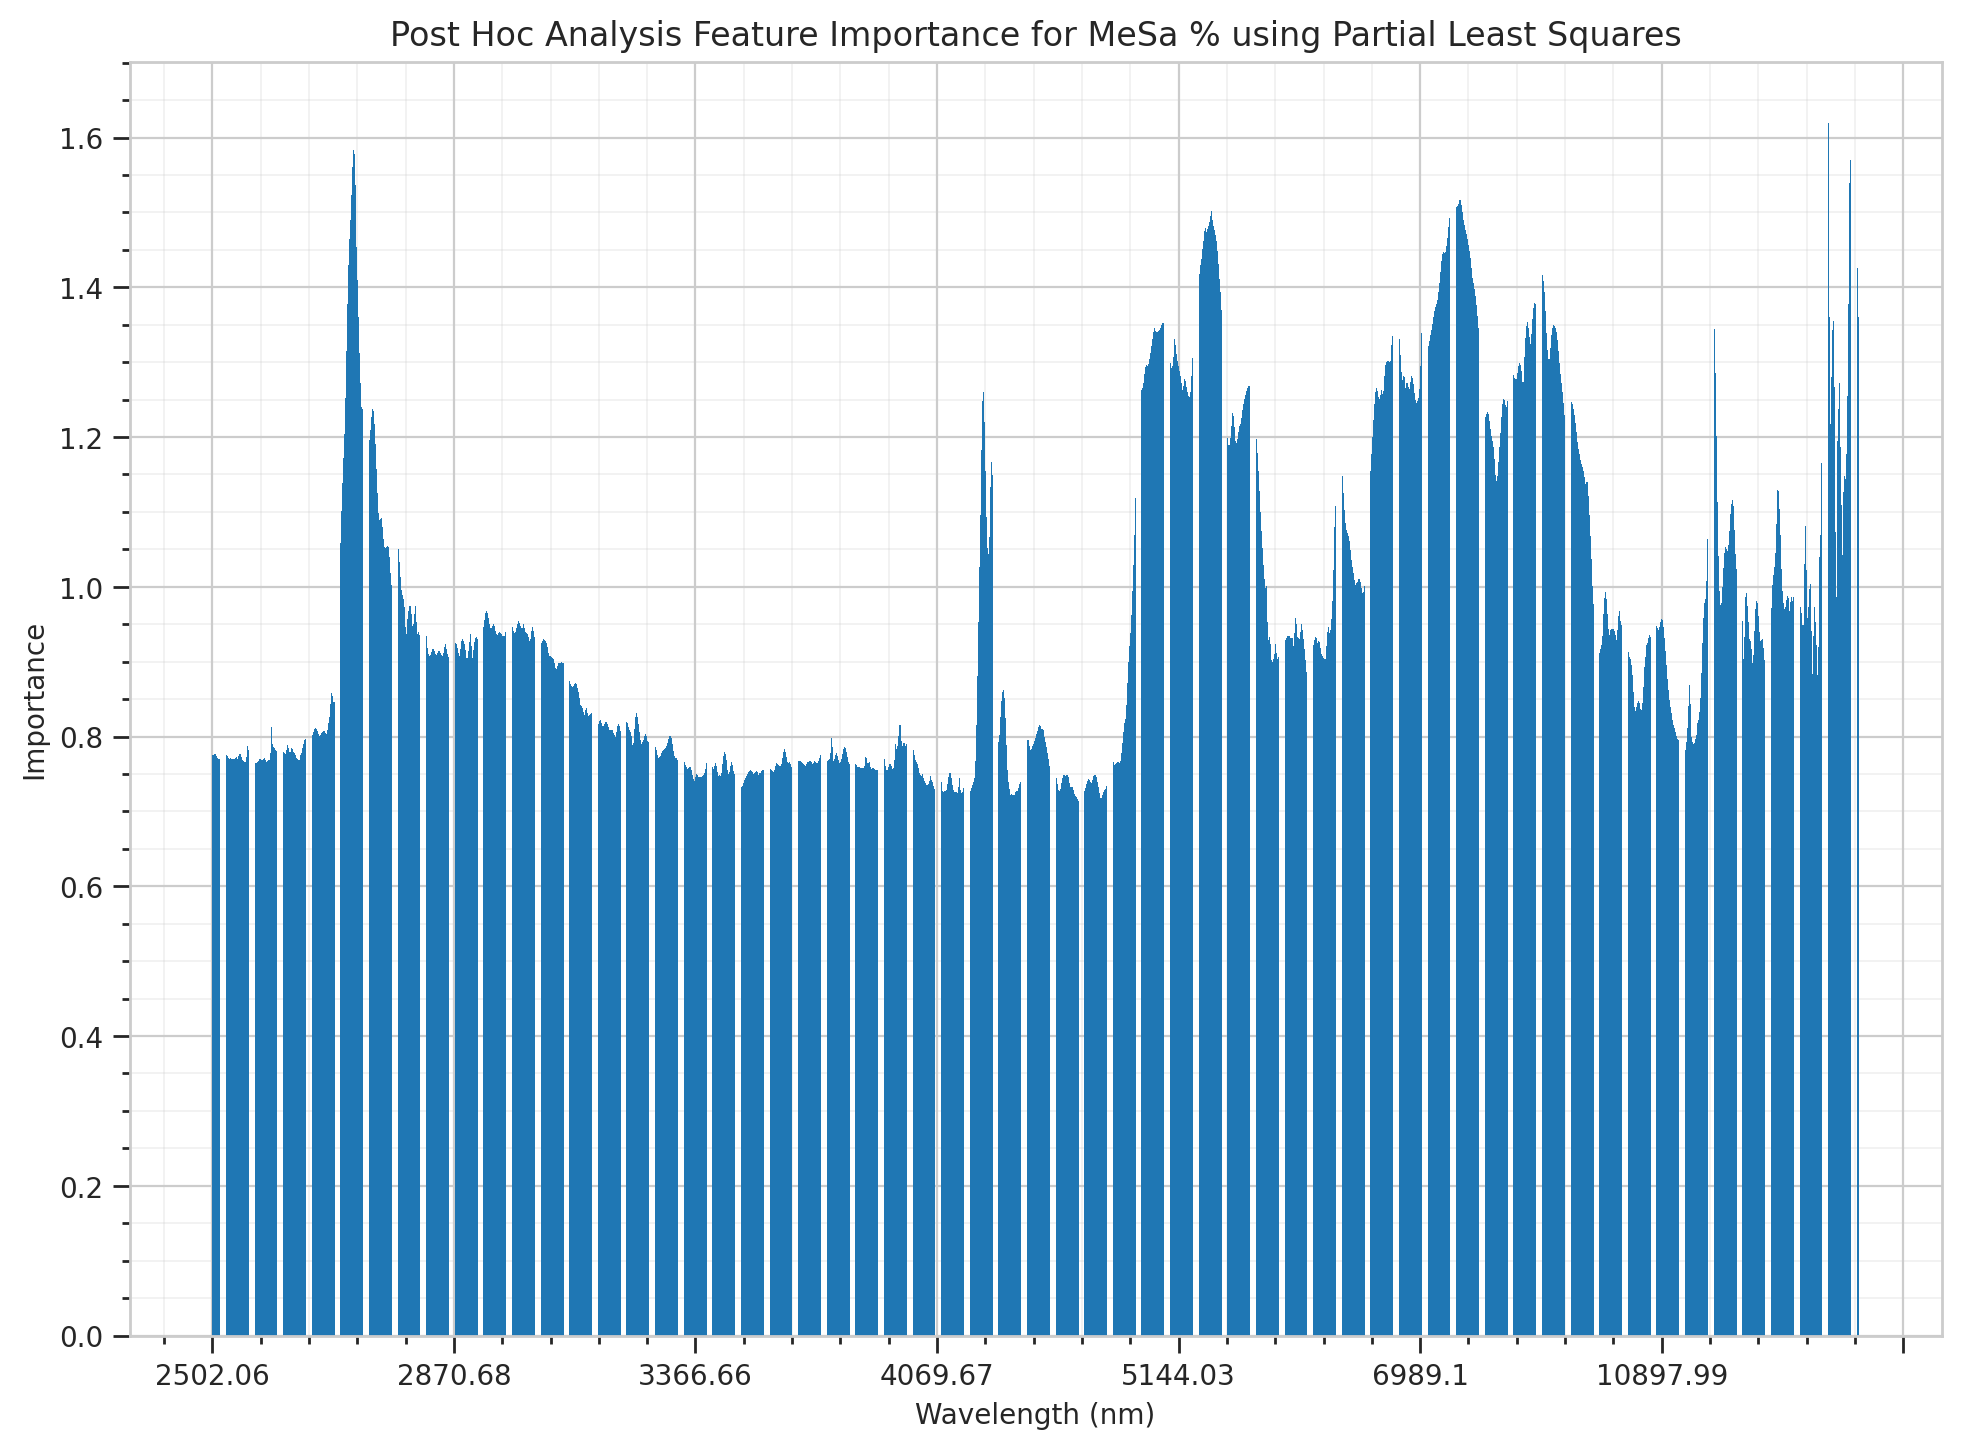

In [58]:
mesa_res_pls = pls.fit_and_predict(dataset_mesa,  idx_trn=idx_trn_mesa, get_model=True)
xai = PostHocAnalysis(dataset_mesa)
ax = xai.bar_plot_importance(mesa_res_pls.iloc[0]["feature_importance"])
ax.set_title('Post Hoc Analysis Feature Importance for MeSa % using Partial Least Squares')
ax.set_xlabel('Wavelength (nm)')